# 1. INTRODUCTION

## 1.1. BUSINESS UNDERSTANDING

Tanzania, a country with a population exceeding 57 million, grapples with the critical issue of providing clean water to its inhabitants. Despite efforts, a significant portion of the population lacks access to basic clean water supply. Approximately 61% of Tanzanians have access to clean water, leaving a substantial portion vulnerable to waterborne diseases and health complications. The government, along with various stakeholders and NGOs, has allocated resources and initiated projects aimed at enhancing the clean water supply infrastructure. However, persistent challenges such as aging or non-functional water wells continue to impede progress. The lack of access to clean water significantly impacts public health, contributing to increased rates of diseases and fatalities, particularly among vulnerable populations such as children and the elderly.

Waterborne illnesses, including diarrheal diseases, cholera, and typhoid, remain prevalent due to contaminated water sources, leading to avoidable deaths and ongoing health crises.

## 1.2. Problem Statement

The Ministry of Water and the World Health Organization (WHO) in Tanzania are partnering to address the critical challenge of ensuring sustainable access to clean water for communities. Despite Tanzania's efforts in expanding clean water availability over the past years, an estimated 31,000 annual deaths are attributed to inadequate water and sanitation services, with over 10% being preventable.

In response, an initiative is underway to tackle the issue by examining the distribution and functionality of water wells and pumps across Tanzania. Notably, the assessment reveals a spectrum of pump conditions, ranging from functioning pumps in need of maintenance to non-operational ones, significantly impacting water accessibility.

As a lead data scientist leading this effort, my primary task is to identify discernible patterns enabling the prediction of water pump functionality. The central goal is to discern crucial features that influence water pump functionality, thereby providing actionable insights to the Ministry of Water and WHO. These insights will empower these entities to accurately predict maintenance requirements and strategically allocate resources toward non-functional water points. This initiative ultimately aims to enhance water accessibility, mitigate preventable deaths associated with inadequate water and sanitation services, and align efforts with Tanzania's commitment to sustainable development goals.



# 1.3. Main Objectives

## 1.3.1 Main Objectives

Develop a robust machine learning model capable of forecasting water pump performance utilizing diverse attributes, including pump type, installation date and well conditions.

## 1.3.2 Specific Objectives 

A) Identify the most influential features impacting water pump functionality through statistical analysis and feature importance techniques.

B) Implement various machine learning algorithms, including but not limited to Random Forest, Gradient Boosting, or Logistic Regression, to build a predictive model.

C) Develope data-informed reccommendations to increase the accessibility of clean water sources

# 2. Libraries

In [1439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings
from sklearn import tree, svm, impute, feature_selection, naive_bayes, linear_model
from sklearn.tree import plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, f1_score
import xgboost as xgb



# 3. Data Understanding

In [1440]:
#loading training set values and training set labels data

df_1 = pd.read_csv('training_set_labels.csv')
df_2 = pd.read_csv('training_set_values.csv')

display(df_1.head())
df_2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [1441]:
## combining the two datasets together 

# Assuming 'id' is the common column between df_1 and df_2
df = df_1.join(df_2.set_index('id'), on='id')

# Display the first few rows of the merged DataFrame df
display(df.head())



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [1442]:
## previewing the shape and information of our dataframe 
df.shape

(59400, 41)

In [1443]:
# statistical analysis of our dataset 
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [1444]:
# checking to see the data types in our dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [1445]:
#Determining numerical and categorical data
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")


Number of numerical columns: 10
Number of categorical columns: 31


* The rows represent unique entities of observations
* The target column is 'status_group', representing the operational status of waterpoints, categorized into 'functional', 'non-functional', or 'functional needs repair'.
* For a ternary target variable: 'functional' = 2, 'functional needs repair' = 1, 'functional' = 0.
* In our analysis, the number of rows we have favors our modelling. The longer our data the better. We have a total of 41 columns, 10 of which have numerical data while 31 columns have categorical data.

# 4. Data Cleaning And Preprocessing

### Duplicates

In [1446]:
def check_duplicates(data):
    """Function that checks for duplicate rows in a pandas DataFrame"""
    duplicate_rows = data[data.duplicated(keep=False)]
    
    if duplicate_rows.empty:
        print('Our Dataset has no Duplicates')
    else:
        duplicates_percentage = np.round((len(duplicate_rows) / len(data)) * 100, 2)
        print(f'Duplicated rows constitute {duplicates_percentage}% of our dataset')


check_duplicates(df)



Our Dataset has no Duplicates


### Checking for id duplicates. 
### Each id is unique identifier for the wells and should have no duplicated ids

In [1447]:
duplicate_ids = df[df.duplicated(subset='id', keep=False)]

if duplicate_ids.empty:
    print('No duplicate IDs found.')
else:
    print('Duplicate IDs found:')
    print(duplicate_ids)



No duplicate IDs found.


### Outliers

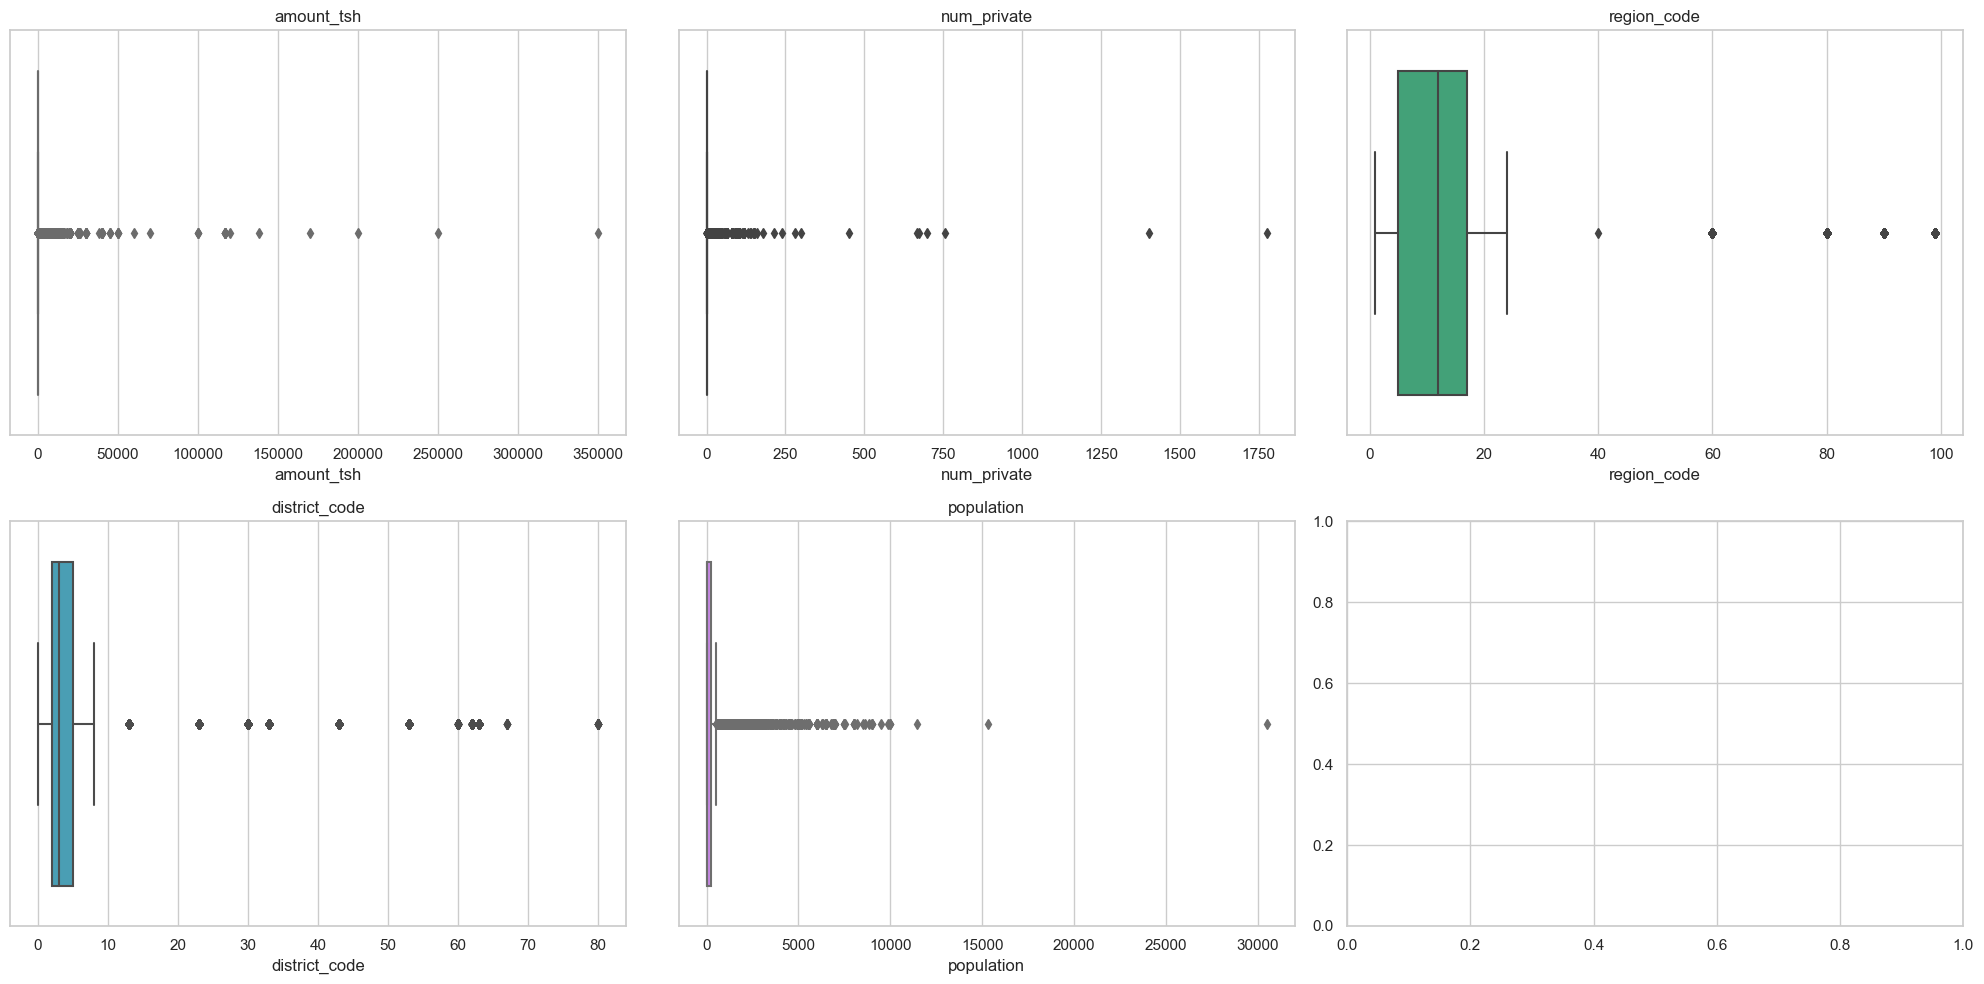

In [1448]:
def plot_selected_boxplots(data, cols):
    # Define a color palette for the boxplots
    colors = sns.color_palette("husl", len(cols))
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    axes = axes.ravel()

    for i, col in enumerate(cols):
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        axes[i].set_title(col)
        axes[i].set_ylabel("")  # Remove default ylabel

    plt.tight_layout()

# the columns to plot
selected_columns = ['amount_tsh', 'num_private', 'region_code', 'district_code', 'population']
plot_selected_boxplots(df[selected_columns], selected_columns)
plt.show()






we have ouliers in the amount_tsh, num_private, region_code, district_code, and population columns. In the context of geographical coding such as 'region_code' and 'district_code', may not be considered outliers as they typically represent categorical or numerical codes assigned to specific regions or districts. The 'amount_tsh' column represents the total static head of water available to a pump. Outliers in this column might indicate extreme cases, such as usually high or low water source depths and can effect our data analysis and modelling. The 'num_private' column denotes the number of private use facilities. Outliers in this column could indicate rare occurances of private facilities within the dataset. Understanding these outliers helps in deciding whether to treat them separately or modify their effect on the dataset which we shall do in Exploratory Data Analysis. For the 'population' column, a seemingly large or small value might necessarily be an outlier if it accurately represents the population of a particular region.

### Missing Values

In [1449]:
def missing_values(data):
    missing_values = data.isnull().sum().sort_values(ascending=False)
    missing_val_percent = ((data.isnull().sum() / len(data)).sort_values(ascending=False))

    """ creating a dataframe containing missing values and their percentages """
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})
    
    return missing_df[missing_df['Percentage %'] > 0]

missing_values(df)


,Missing Values,Percentage %
scheme_name,28166,0.474175
scheme_management,3877,0.065269
installer,3655,0.061532
funder,3635,0.061195
public_meeting,3334,0.056128
permit,3056,0.051448
subvillage,371,0.006246


The primary objective of our project is to predict malfunctioning water pumps using data features. Columns such as 'scheme_name' and 'scheme_management' are unrelated to this goal as they designate the scheme's name and management, which aren't pivotal for our predictions. Moreover, 'scheme_name' exhibits a high percentage (47%) of missing values, therefore, it's beneficial to exclude these columns from our analysis to streamline the dataset for our predictive model.

### Dropping the columns scheme_name and scheme_management

In [1450]:
# Dropping 'scheme_name' and 'scheme_management' columns
df.drop(['scheme_name', 'scheme_management'], axis=1, inplace=True)


In [1451]:
df.shape

(59400, 39)

1. **Installer**: This column signifies the organization or individual that installed the waterpoint. Understanding the installer might offer insights into the quality or maintenance of the waterpoints based on the performance or reputation of different installers. It could help in assessing the reliability of the installation, indirectly impacting the functionality of water pumps.

2. **Funder:** Indicates the source that funded the waterpoint construction. Knowledge of funders might provide clues about the locations or types of waterpoints they invest in, which could reveal patterns or preferences for waterpoint funding. This information might indirectly relate to the reliability or maintenance of the waterpoints.

3. **Public Meeting:** Represents whether there was a public meeting held in the community regarding the waterpoint. Communities actively involved in decision-making processes might show a higher sense of ownership and responsibility towards the waterpoints, potentially impacting their functionality.



In [1452]:
#Removing rows with missing values from column installer, funder and public_meeting
columns_to_check = ['installer', 'funder', 'public_meeting']

# Dropping rows with missing values in specified columns
df.dropna(subset=columns_to_check, inplace=True)


In [1453]:
df.shape

(52576, 39)

### Dropping Irrelevant Columns

The columns such as 'Permit', 'Subvillage', 'Wpt_name', 'Region_code', 'District_code', 'Lga', 'Ward', 'Recorded_by', and 'Date_recorded' in our dataset seem to hold information that might not be directly linked to the primary objective of predicting faulty water pumps. For instance, factors like whether a permit is granted, specific geographic details, administrative divisions, or the entity that recorded the data and the date of recording might not significantly contribute to the prediction of whether a water pump is functional or not. As these features lack a direct and substantial impact on determining the operational status of water pumps, considering the primary aim of predicting faulty water pumps, it might be beneficial to omit these columns from our dataset to streamline the analysis towards more pertinent features.

In [1454]:
columns_to_drop = ['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded']
df.drop(columns=columns_to_drop, inplace=True)


### Data Correspondence

#### Water Quality and Quality Group

In [1455]:
print(df['water_quality'].value_counts())
print('**************************************')
print('**************************************')
print(df['quality_group'].value_counts())


soft                  45611
salty                  4429
unknown                1012
milky                   717
coloured                379
salty abandoned         239
fluoride                173
fluoride abandoned       16
Name: water_quality, dtype: int64
**************************************
**************************************
good        45611
salty        4668
unknown      1012
milky         717
colored       379
fluoride      189
Name: quality_group, dtype: int64


The columns `water_quality` and `quality_group` demonstrate a relatedness in their information representation regarding water quality. While `water_quality` offers a more detailed breakdown of various water quality categories, `quality_group` provides a more generalized perspective by consolidating similar categories into broader groups. This apparent redundancy or correlation between the two columns could be advantageous for analyses or modeling tasks that require different levels of granularity in interpreting water quality information.

In [1456]:
# dropping quality_group

df.drop(columns=['quality_group'], inplace=True)


#### quantity and quantity group

In [1457]:
print(df['quantity'].value_counts())
print('**************************************')
print('**************************************')
print(df['quantity_group'].value_counts())


enough          30157
insufficient    13423
dry              5370
seasonal         3237
unknown           389
Name: quantity, dtype: int64
**************************************
**************************************
enough          30157
insufficient    13423
dry              5370
seasonal         3237
unknown           389
Name: quantity_group, dtype: int64


The columns `quantity` and `quantity_group` exhibit the same unique value counts, suggesting that they might contain similar or the same information in different representations. Both columns seem to provide similar categorizations of water quantity, depicting the same counts for various categories. This similarity suggests redundancy or a potential one-to-one relationship between these columns.

In [1458]:
# Dropping the 'quantity_group' column
df.drop(columns='quantity_group', inplace=True)


#### Source, source type and source class

In [1459]:
# Compute and print value counts for 'source'
print(df['source'].value_counts())
print('**************************************')
print('**************************************')

# Compute and print value counts for 'source_type'
print(df['source_type'].value_counts())
print('**************************************')
print('**************************************')

# Compute and print value counts for 'source_class'
print(df['source_class'].value_counts())


spring                  15237
shallow well            15041
machine dbh              9512
river                    8646
rainwater harvesting     1896
hand dtw                  784
lake                      626
dam                       604
other                     195
unknown                    35
Name: source, dtype: int64
**************************************
**************************************
spring                  15237
shallow well            15041
borehole                10296
river/lake               9272
rainwater harvesting     1896
dam                       604
other                     230
Name: source_type, dtype: int64
**************************************
**************************************
groundwater    40574
surface        11772
unknown          230
Name: source_class, dtype: int64


By selecting the 'source_type' column over the 'source' and 'source_class', we are prioritizing a more detailed breakdown of water sources. This choice offers clearer and more comprehensive information, enhancing our understanding and analysis of the water sources. Consequently, it can potentially contribute more effectively to our analytical models.

In [1460]:
water_source_col = df.drop(['source', 'source_class'], axis=1)


#### Water point and Water point type group

In [1461]:
print(df['waterpoint_type'].value_counts())
print('**************************************')
print('**************************************')
print(df['waterpoint_type_group'].value_counts())


communal standpipe             24550
hand pump                      15781
communal standpipe multiple     5782
other                           5618
improved spring                  731
cattle trough                    107
dam                                7
Name: waterpoint_type, dtype: int64
**************************************
**************************************
communal standpipe    30332
hand pump             15781
other                  5618
improved spring         731
cattle trough           107
dam                       7
Name: waterpoint_type_group, dtype: int64


The columns 'waterpoint_type' and 'waterpoint_type_group' describe different types of water points. They both include similar information, but 'waterpoint_type' shows more specific categories for communal standpipes, while 'waterpoint_type_group' combines these categories into more general groups. Choosing 'waterpoint_type_group' makes sense because it provides a broader view of the water point types with less detail but easier comprehension.

In [1462]:
df.drop('waterpoint_type', axis=1, inplace=True)


#### Payment and Payment type

In [1463]:
print(df['payment'].value_counts())
print('**************************************')
print('**************************************')
print(df['payment_type'].value_counts())


never pay                22723
pay per bucket            8312
pay monthly               8009
unknown                   5208
pay when scheme fails     3850
pay annually              3513
other                      961
Name: payment, dtype: int64
**************************************
**************************************
never pay     22723
per bucket     8312
monthly        8009
unknown        5208
on failure     3850
annually       3513
other           961
Name: payment_type, dtype: int64


 These columns seem to reflect similar information regarding payment methods but are categorized differently. For instance, 'pay per bucket' in 'payment' corresponds to 'per bucket' in 'payment_type', and 'pay monthly' in 'payment' matches 'monthly' in 'payment_type'. The column 'payment_type' provides a more concise representation of the payment methods compared to 'payment'.

In [1464]:
df.drop('payment', axis=1, inplace=True)


#### Management and Management Type

In [1465]:
print(df['management'].value_counts())
print('**************************************')
print('**************************************')
print(df['management_group'].value_counts())


vwc                 36438
wug                  5516
water board          2674
wua                  2295
private operator     1655
parastatal           1373
water authority       810
other                 682
company               662
unknown               295
other - school         99
trust                  77
Name: management, dtype: int64
**************************************
**************************************
user-group    46923
commercial     3204
parastatal     1373
other           781
unknown         295
Name: management_group, dtype: int64


The 'management' column provides a detailed breakdown of various entities or groups responsible for water management, offering specific names or classifications. It seems to hold more detailed information compared to the summarized groups provided in the 'management_group' column. Therefore, we will use the 'management' column for our analysis.

In [1466]:
df.drop(columns=['management_group'], inplace=True)


#### Extraction Type , Extraction Type Group and Extraction Type Class

In [1467]:
print(df['extraction_type'].value_counts())
print('**************************************')
print('**************************************')
print(df['extraction_type_class'].value_counts())
print('**************************************')
print('**************************************')
print(df['extraction_type_group'].value_counts())


gravity                      23763
nira/tanira                   7234
other                         5598
submersible                   3918
swn 80                        3431
mono                          2514
india mark ii                 2257
afridev                       1523
ksb                           1336
other - rope pump              344
other - swn 81                 206
windmill                       111
cemo                            90
india mark iii                  88
other - play pump               84
walimi                          46
climax                          32
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64
**************************************
**************************************
gravity         23763
handpump        14870
other            5598
submersible      5254
motorpump        2636
rope pump         344
wind-powered      111
Name: extraction_type_class, dtype: int64
**************************************
*********************

The 'extraction_type_group' column seems to provide a summarized categorization of extraction types, grouping various methods such as 'gravity,' 'nira/tanira,' 'submersible,' 'swn 80,' among others. It appears to offer a more generalized classification of extraction types as opposed to the detailed breakdown found in the 'extraction_type' and 'extraction_type_class' columns. This column likely simplifies the types of extraction methods used, making it a better choice for analysis, allowing a clearer understanding of the primary extraction mechanisms employed. Thus, selecting 'extraction_type_group' could provide a more straightforward and condensed perspective on the extraction methods utilized in the dataset.

In [1468]:
extraction_col = df[['extraction_type', 'extraction_type_class']]
df.drop(columns=extraction_col.columns, inplace=True)


#### Acounting for Num Private

In [1469]:
print(df['num_private'].value_counts())


0       51852
6          73
1          68
8          46
5          44
32         40
45         36
15         35
39         30
93         28
3          26
7          24
65         22
47         21
102        20
4          19
2          18
17         17
80         15
20         14
25         12
41         10
34         10
11         10
16          8
120         7
22          6
150         6
24          5
50          5
12          5
58          4
38          4
9           4
14          3
10          3
26          2
27          2
240         1
1776        1
55          1
94          1
755         1
450         1
300         1
60          1
87          1
280         1
672         1
668         1
42          1
23          1
62          1
180         1
131         1
35          1
141         1
213         1
698         1
1402        1
Name: num_private, dtype: int64


The 'num_private' column shows the number of private wells at different water points. Most of the time (in about 51,852 instances), there aren't any private wells, so the count is zero. Other than that, there are some small counts of private wells, but they're not common and show up rarely.

In [1470]:
df.drop(columns=['num_private'], inplace=True)


#### Installer

The installer column seems to have some spelling mistakes or different syntax between same categories. We replace the spelling mistakes and have same categories in same name


In [1471]:
replacement_dict = {
    'District Water Department': 'District water department',
    'District water depar': 'District water department',
    'Distric Water Department': 'District water department',
    'FinW': 'Fini Water',
    'Fini water': 'Fini Water',
    'FINI WATER': 'Fini Water',
    'JAICA': 'Jaica',
    'COUN': 'District council',
    'District COUNCIL': 'District council',
    'DISTRICT COUNCIL': 'District council',
    'District Counci': 'District council',
    'RC CHURCH': 'RC Church',
    'RC Churc': 'RC Church',
    'RC': 'RC Church',
    'RC Ch': 'RC Church',
    'RC C': 'RC Church',
    'RC CH': 'RC Church',
    'RC church': 'RC Church',
    'RC CATHORIC': 'RC Church',
    'Central Government': 'Central government',
    'Tanzania Government': 'Central government',
    'central government': 'Central government',
    'Cental Government': 'Central government',
    'Cebtral Government': 'Central government',
    'Tanzanian Government': 'Central government',
    'Tanzania government': 'Central government',
    'Centra Government': 'Central government',
    'CENTRAL GOVERNMENT': 'Central government',
    'TANZANIAN GOVERNMENT': 'Central government',
    'Central govt': 'Central government',
    'Centr': 'Central government',
    'Centra govt': 'Central government',
    'World vision': 'world vision',
    'World Division': 'world vision',
    'World Vision': 'world vision',
    'Unisef': 'Unicef',
    'UNICEF': 'Unicef',
    'DANID': 'DANIDA',
    'villigers': 'villagers',
    'villager': 'villagers',
    'Villagers': 'villagers',
    'Villa': 'villagers',
    'Village': 'villagers',
    'Villi': 'villagers',
    'Village Council': 'villagers',
    'Village Counil': 'villagers',
    'Villages': 'villagers',
    'Vill': 'villagers',
    'Village community': 'villagers',
    'Villaers': 'villagers',
    'Village Community': 'villagers',
    'Villag': 'villagers',
    'Villege Council': 'villagers',
    'Village council': 'villagers',
    'Village  Council': 'villagers',
    'Villagerd': 'villagers',
    'Village Technician': 'villagers',
    'Village Office': 'villagers',
    'Village community members': 'villagers',
    'Commu': 'Community',
    'Communit': 'Community',
    'commu': 'Community',
    'COMMU': 'Community',
    'COMMUNITY': 'Community',
    'GOVERNMENT': 'Government',
    'GOVER': 'Government',
    'GOVERNME': 'Government',
    'GOVERM': 'Government',
    'GOVERN': 'Government',
    'Gove\nr': 'Government',
    'Gove': 'Government',
    'Governme': 'Government',
    'Governmen': 'Government',
    'Hesawa': 'HESAWA',
    'Colonial Government': 'Colonial government',
    'Government of Misri': 'Misri Government',
    'Italy government': 'Italian government',
    'British colonial government': 'British government',
    'Concern /government': 'Concern/Government',
    'Village Government': 'Village government',
    'Government and Community': 'Government /Community',
    'Cetral government /RC': 'RC church/Central Gover',
    'Government /TCRS': 'TCRS /Government',
    'Government/TCRS': 'TCRS /Government',
    'ADRA /Government': 'ADRA/Government'
}

df['installer'].replace(to_replace=replacement_dict, inplace=True)

# Verify the changes
print(df['installer'].value_counts())


DWE                     16672
Government               1896
Community                1667
DANIDA                   1415
RWE                      1190
                        ...  
kanisa                      1
TUKWARE ENTERP              1
church                      1
TASAFcitizen and LGA        1
SELEPTA                     1
Name: installer, Length: 1890, dtype: int64


#### Funder

Funder has strings of 0 as its obseravtion


In [1472]:
df['funder'].fillna(value='Unknown', inplace=True)

# Replace '0' with 'Unknown'
df['funder'].replace(to_replace='0', value='Unknown', inplace=True)


####  preview shape of our dataframe

In [1473]:
df.shape

(52576, 22)

# 5. Exploratory Data Analysis

### 5.1. Univariate analysis

#### 5.1.1. Numerical Columns Distribution

##### amount_tsh

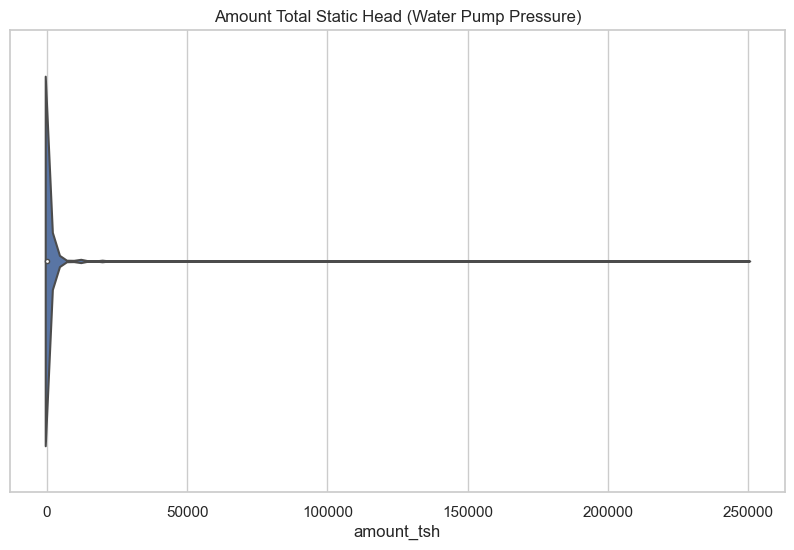

In [1474]:
# Plotting a violin plot for 'amount_tsh'
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['amount_tsh'])
plt.title('Amount Total Static Head (Water Pump Pressure)')
plt.show()




A 'Total Static Head' value of zero implies that the water pump cannot lift any water. This could indicate that there was a pump at the location that is currently non-functional, or there might be no well to draw water from. This leads to the assumption that a 'Total Static Head' value of zero might represent a missing value since having a water pump unable to lift water seems illogical. It could also suggest that there was a functional pump initially, but it's now inoperative. For modeling purposes, we'll consider that there was a water pump present, yet it's no longer operational.

##### gps_height

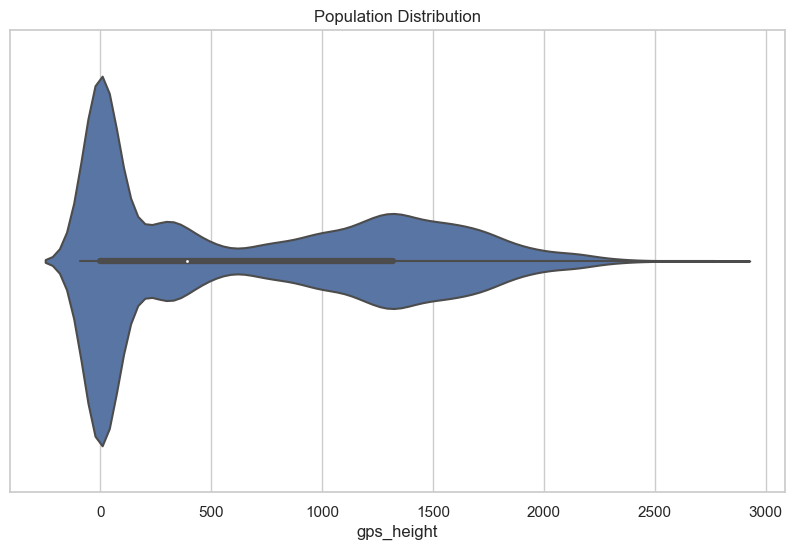

In [1475]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['gps_height'])
sns.set_theme(style="whitegrid")   
plt.title('Population Distribution')
plt.show()

The altitude of a well is typically aligned with the specific geographic location. In Tanzania, the average elevation is approximately 1018 meters above sea level. Consequently, the well's altitude should reasonably correspond to this average or possibly be slightly lower. Altitude holds significance as it affects air pressure, subsequently impacting water pressure in the aquifer. Wells situated at higher altitudes may yield lower water quantities due to reduced air pressure. However, the precise well altitude can vary based on location-specific factors, potentially leading to slight deviations from the surrounding land surface elevation.

##### Population

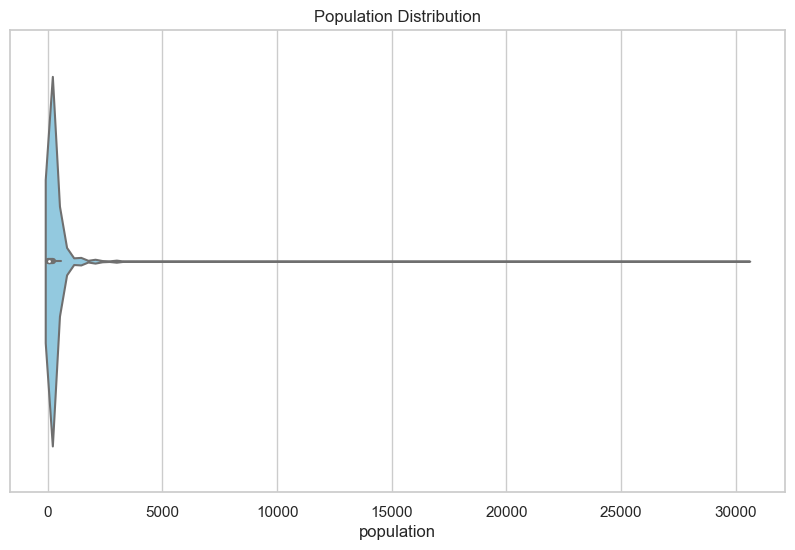

In [1476]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['population'], color='skyblue')
plt.title('Population Distribution')
plt.show()



Based on the visualization, it's evident that the majority of the areas around water wells show a population count of zero. This observation aligns with the notion that although approximately 60% of the population has access to water, they may not solely rely on water wells as their water source. This aspect could be a contributing factor to the trend of the population distribution concentrating around zero.

### 5.1.2 Categorical Columns Distribution

##### Funder

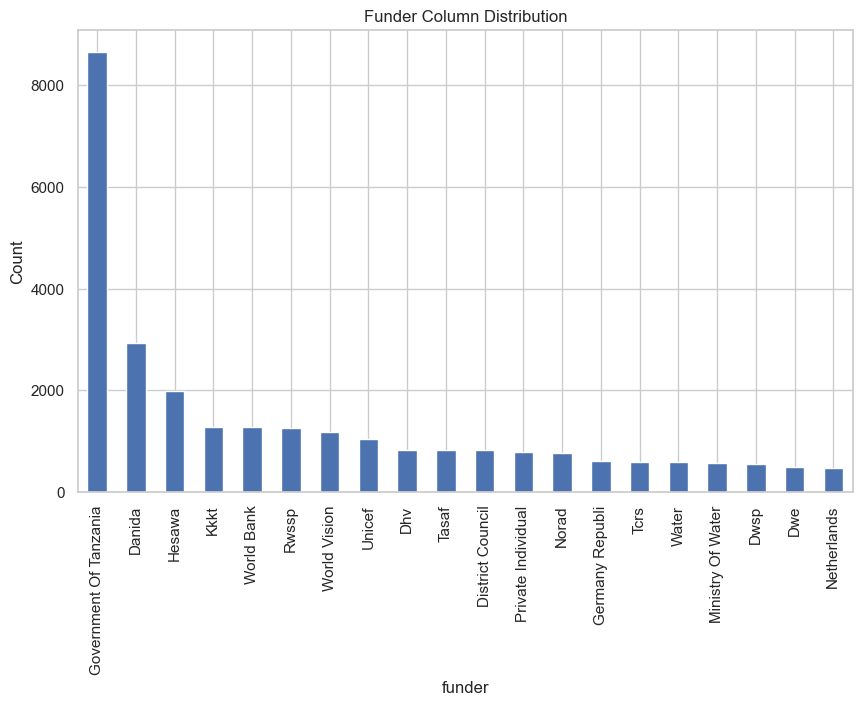

In [1477]:
def plot_data(data, col, title):
    plt.figure(figsize=(10, 6))
    
    column_groupings = data[col].value_counts().head(20)
    column_groupings.plot(kind='bar')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

plot_data(df, 'funder', 'Funder Column Distribution')




The Tanzanian government is the predominant financier for most wells in Tanzania.

##### Installer

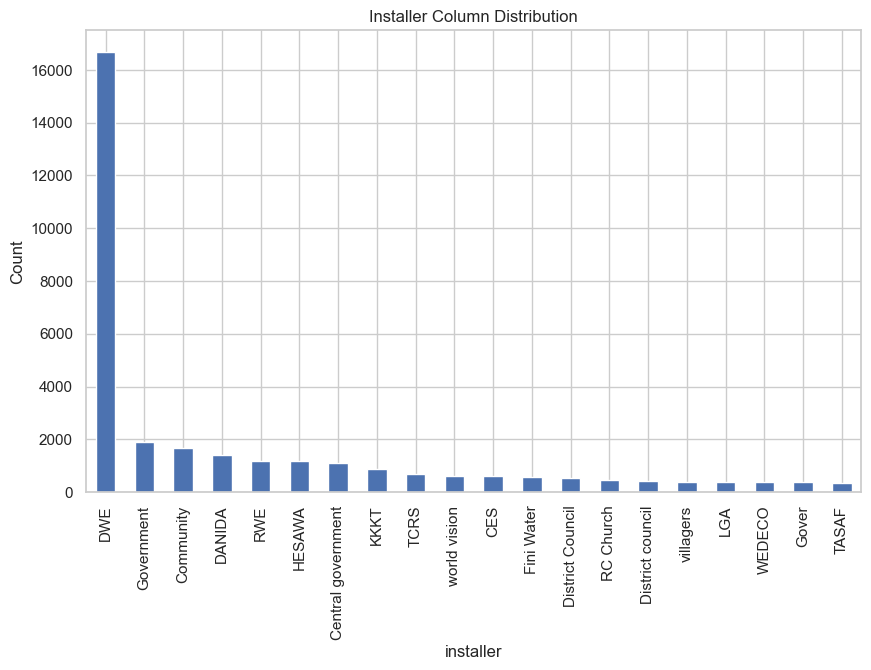

In [1478]:
def plot_data(data, col, title):
    plt.figure(figsize=(10, 6))
    
    column_groupings = data[col].value_counts().head(20)
    column_groupings.plot(kind='bar')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

plot_data(df, 'installer', 'Installer Column Distribution')


Most of the water pump installations are done by the organization DWE



##### Water Point

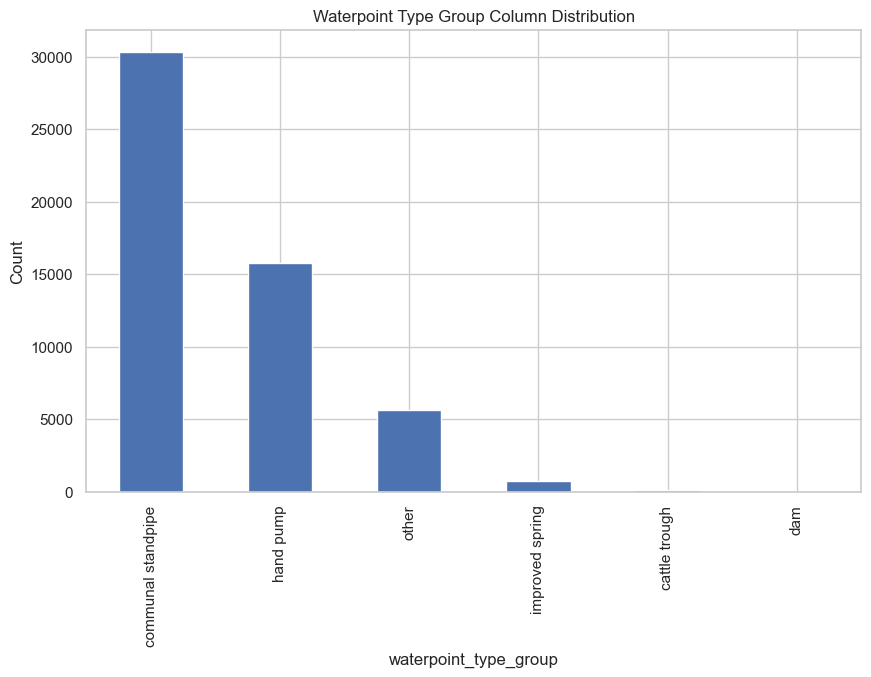

In [1479]:
plot_data(df, 'waterpoint_type_group', 'Waterpoint Type Group Column Distribution')


The communities mostly use communal standpipe to pump their water.



##### Water Source

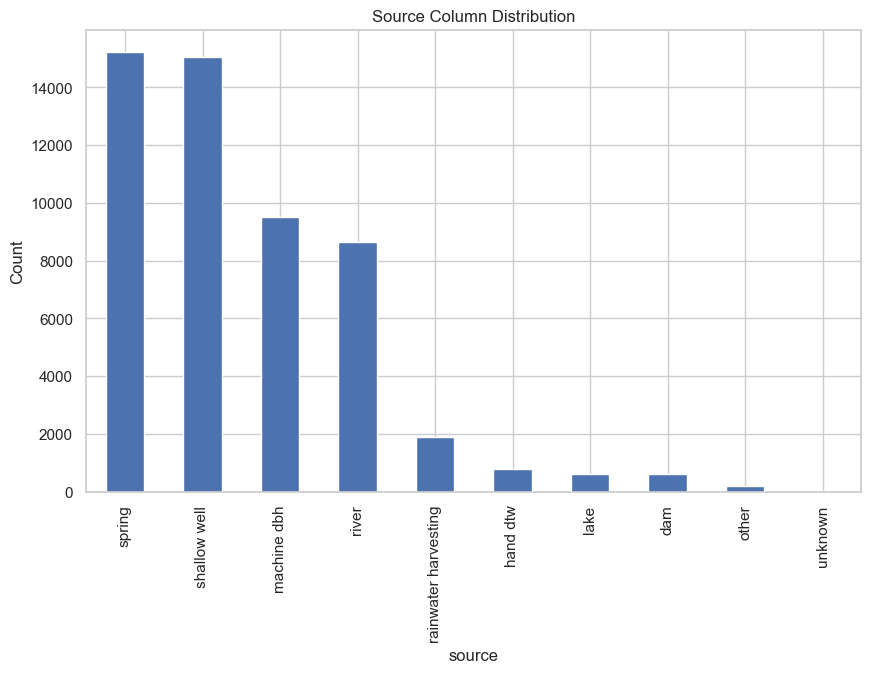

In [1480]:
plot_data(df, 'source', 'Source Column Distribution')


Springs, shallow wells and boreholes are the main sources of water in the country



##### Management

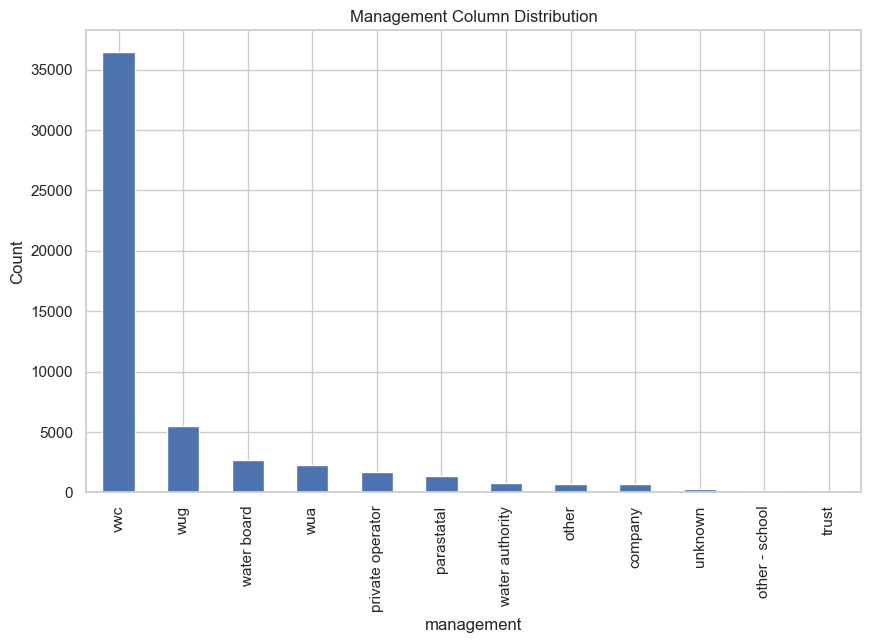

In [1481]:
plot_data(df, 'management', 'Management Column Distribution')


Most of the wells are managed by vwc



##### Extraction Type

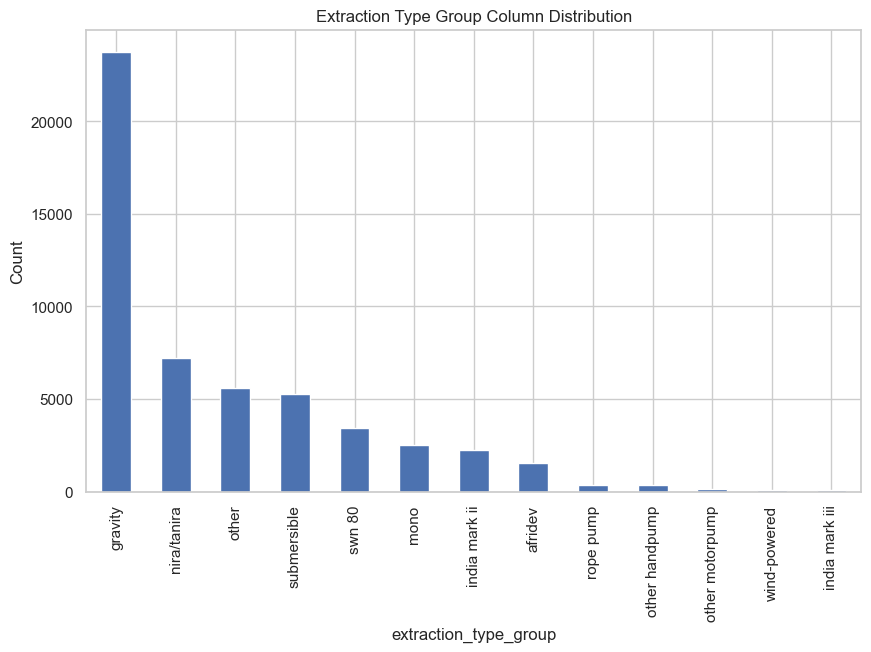

In [1482]:
plot_data(df, 'extraction_type_group', 'Extraction Type Group Column Distribution')


The region mainly extracts its water using gravity



##### Payment

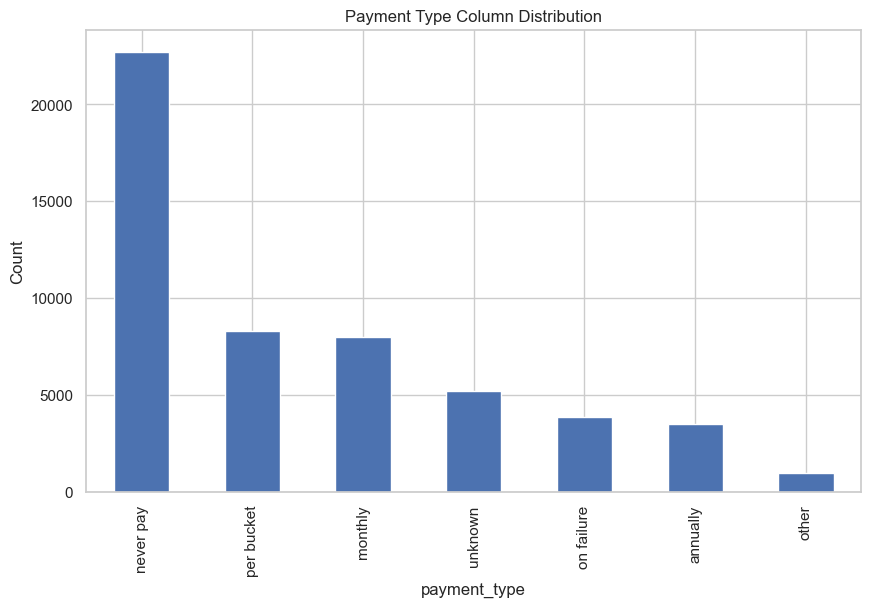

In [1483]:
plot_data(df, 'payment_type', 'Payment Type Column Distribution')


The majority of individuals do not make payments for using water wells to extract water. This situation could arise from the wells being intended for the community's benefit rather than for generating revenue.

##### Water Quality

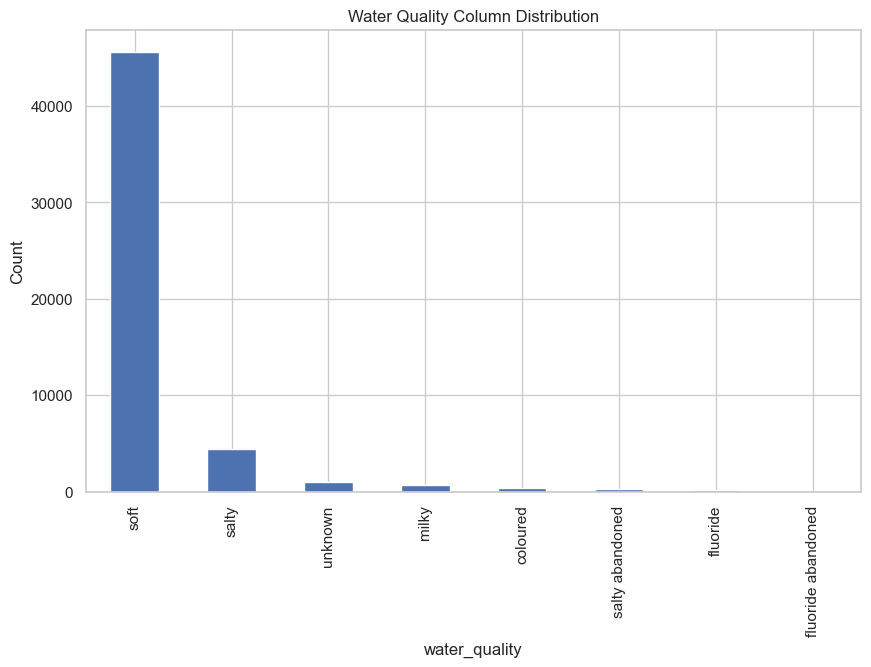

In [1484]:
plot_data(df, 'water_quality', 'Water Quality Column Distribution')


The water quality in Tanzanian communities appears to be soft water, which lacks calcium and magnesium salts. Excessive levels of these salts can be detrimental to health and can cause damage to households. The data visualization illustrates that soft water, such as rainwater or distilled water, is commonly consumed in Tanzanian communities.

##### Quantity

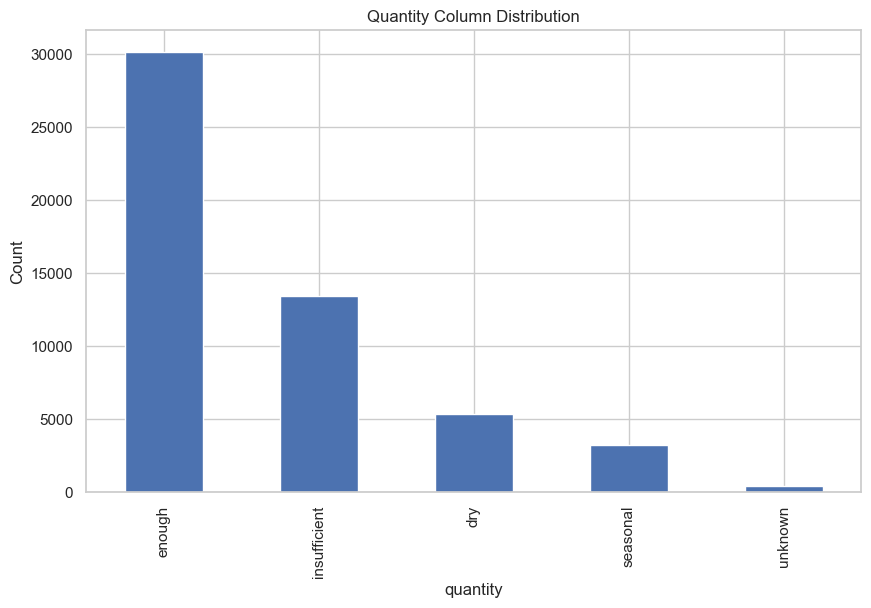

In [1485]:
plot_data(df, 'quantity', 'Quantity Column Distribution')


 Most communities in Tanzania have quite enough water to sustain them.

##### Pie Chart Showing Distribution of Status Group

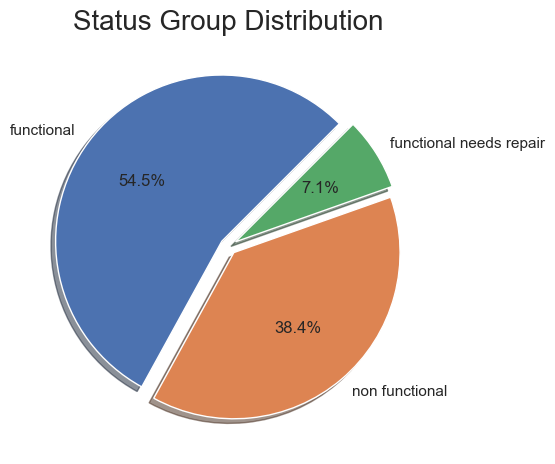

In [1486]:
status_group_counts = df['status_group'].value_counts()

status_group_counts.plot.pie(autopct='%1.1f%%', startangle=45, explode=[0.05, 0.05, 0.05], shadow=True)

plt.title('Status Group Distribution', fontsize=20)
plt.ylabel('')
plt.tight_layout()
plt.show()


Based on the pie chart analysis, it appears that around 55% of the water pumps are in a functional state, approximately 7% are functional but require repair, and the remaining 38% are non-functional.

### 5.2. Bivariate Analysis

#### Status Group and Basin

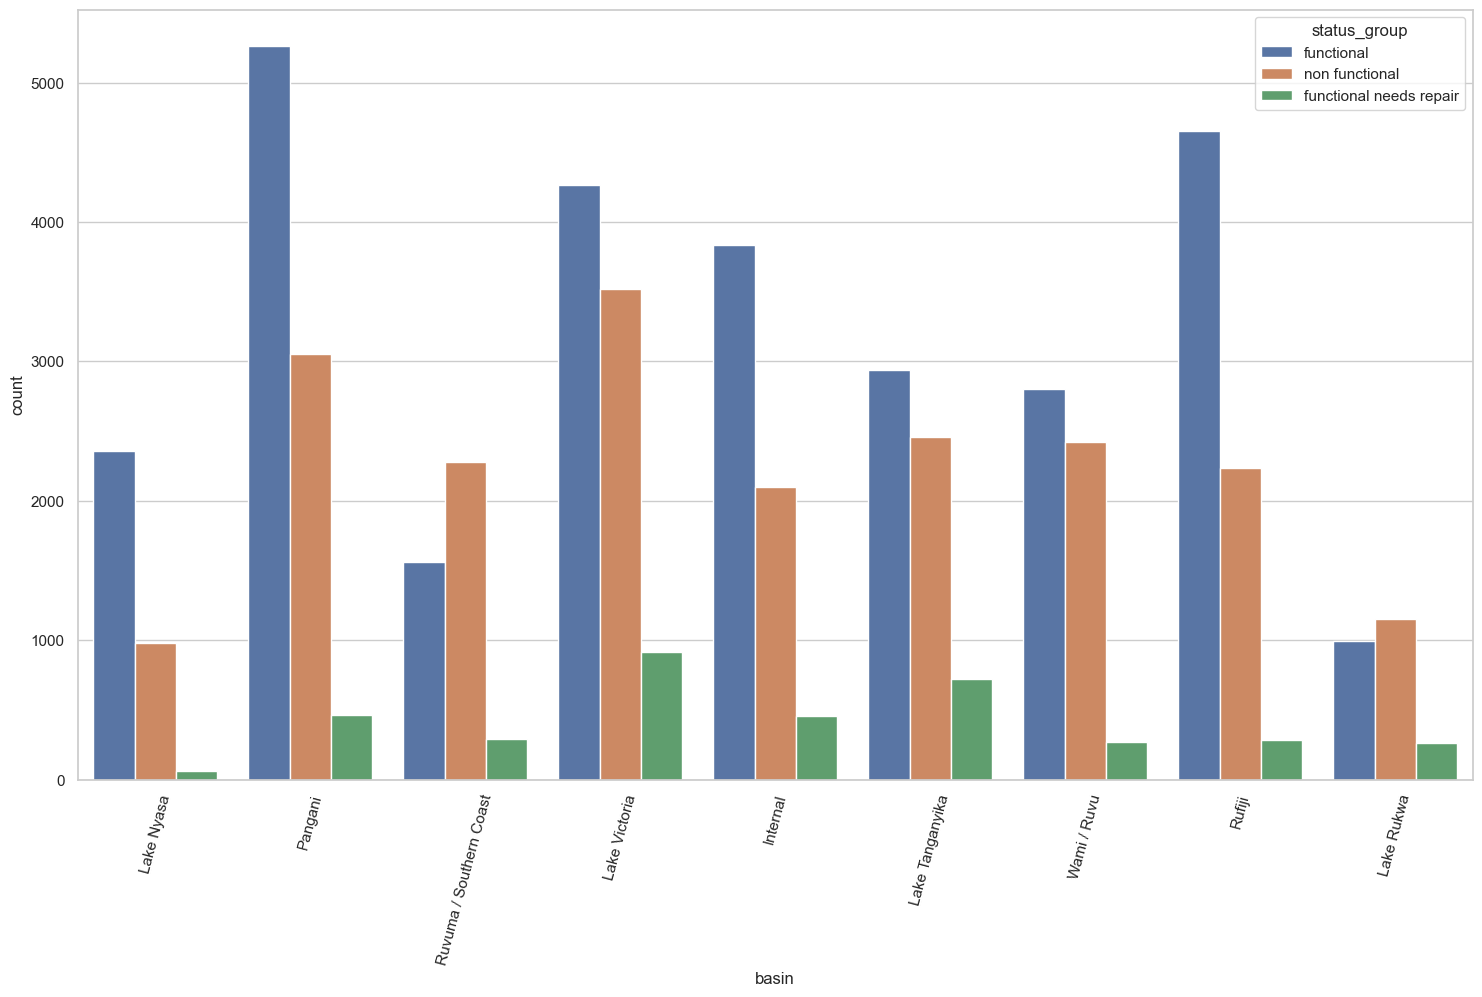

In [1487]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='basin', hue="status_group", data=df)
plt.xticks(rotation=75)
plt.show()


Pangani Basin has the most functional water wells while Lake Victoria contains mostly non - functioning water wells

#### Public Meeting and the Status Group

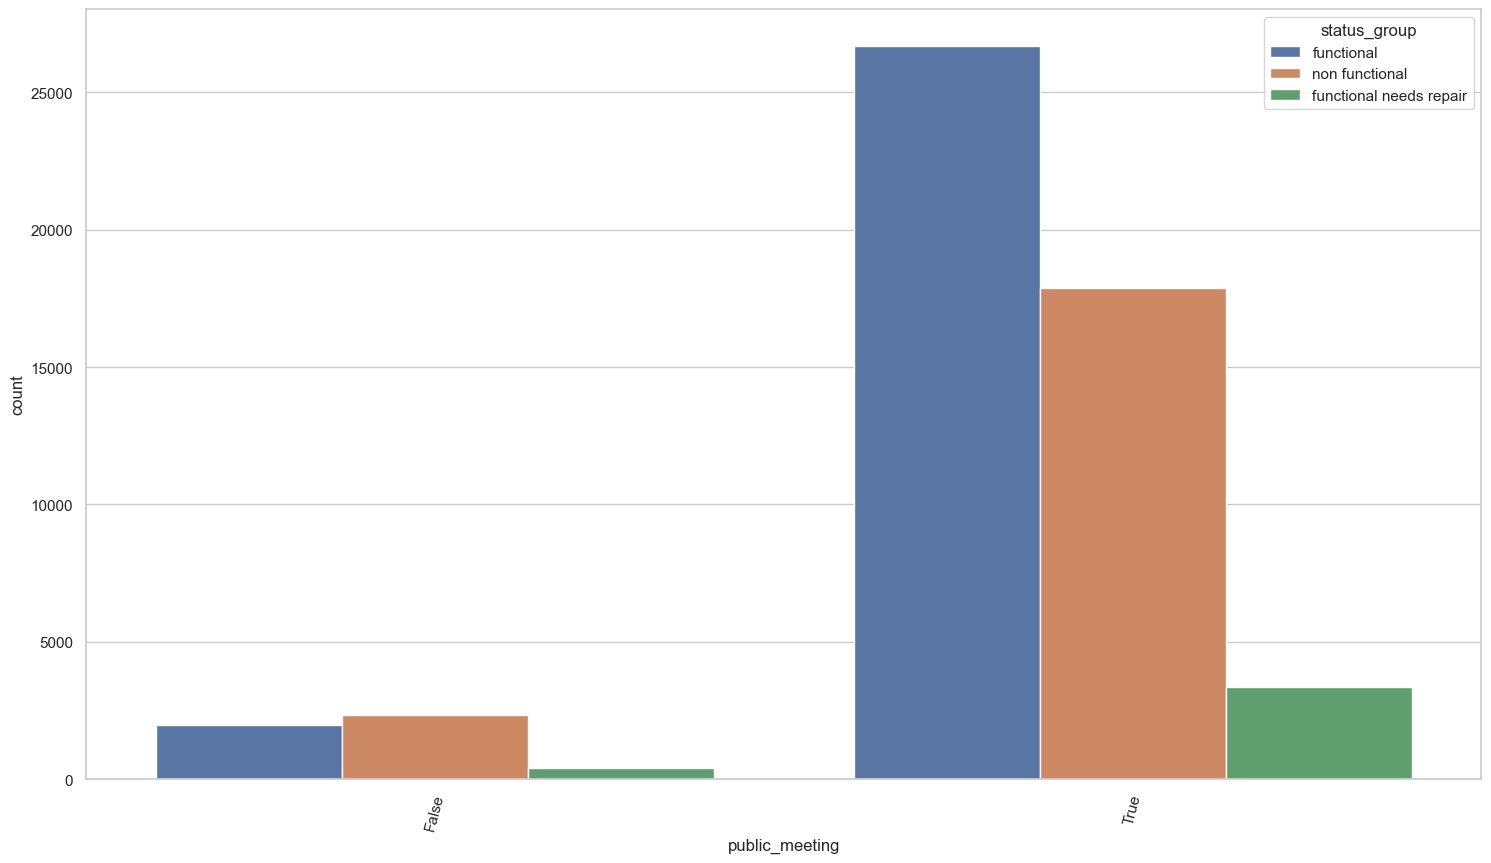

In [1488]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='public_meeting', hue='status_group', data=df)
plt.xticks(rotation=75)
plt.show()


As discussed before public meetings are forums where communities raise their issues, communities that present their grievances have more functional water wells

#### Quantity and Status Group

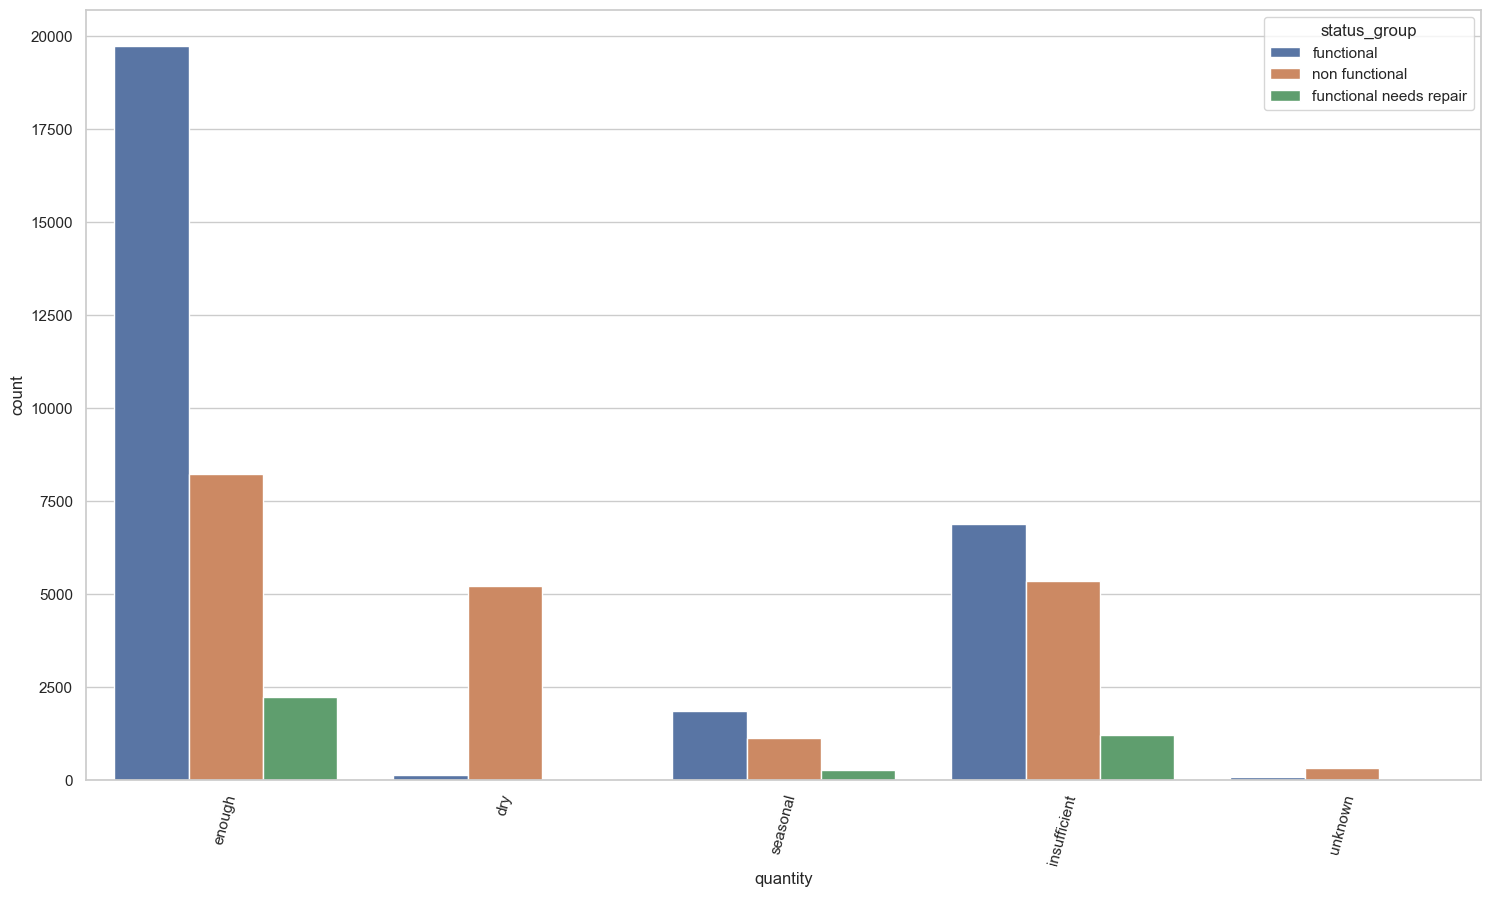

In [1489]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='quantity', hue='status_group', data=df)
plt.xticks(rotation=75)
plt.show()


More water correlates with more functions of the wells

#### Management and Status Group

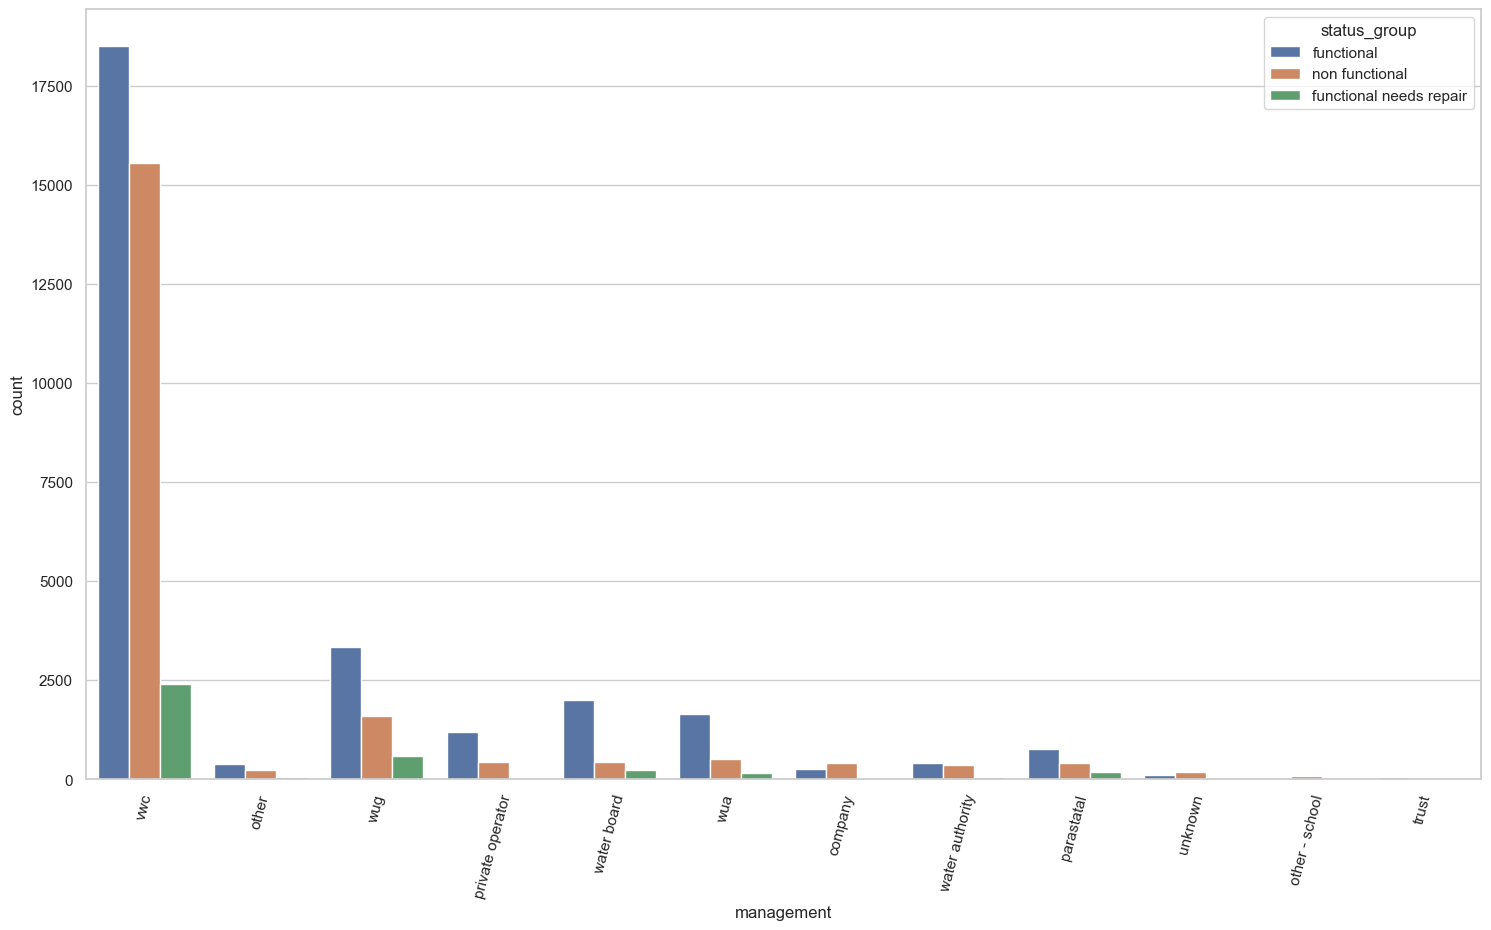

In [1490]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='management', hue='status_group', data=df)
plt.xticks(rotation=75)
plt.show()


Most wells are manged by VWC

#### Water Point and Status Group

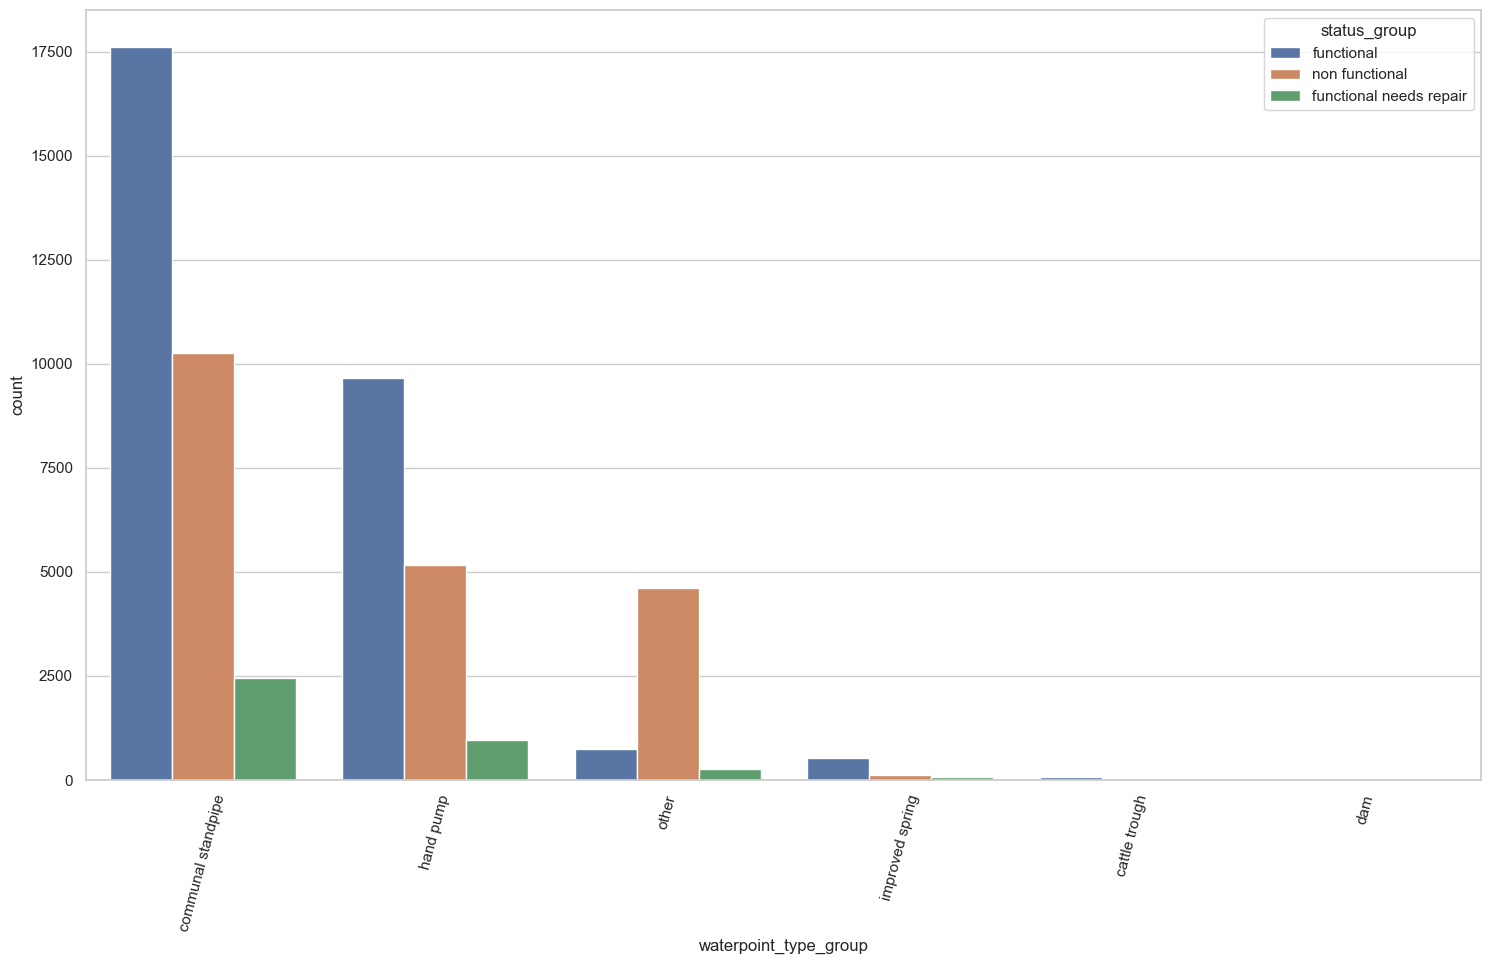

In [1491]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='waterpoint_type_group', hue='status_group', data=df)
plt.xticks(rotation=75)
plt.show()


Communal standpipes have the most functional water.

#### Region and Status Group

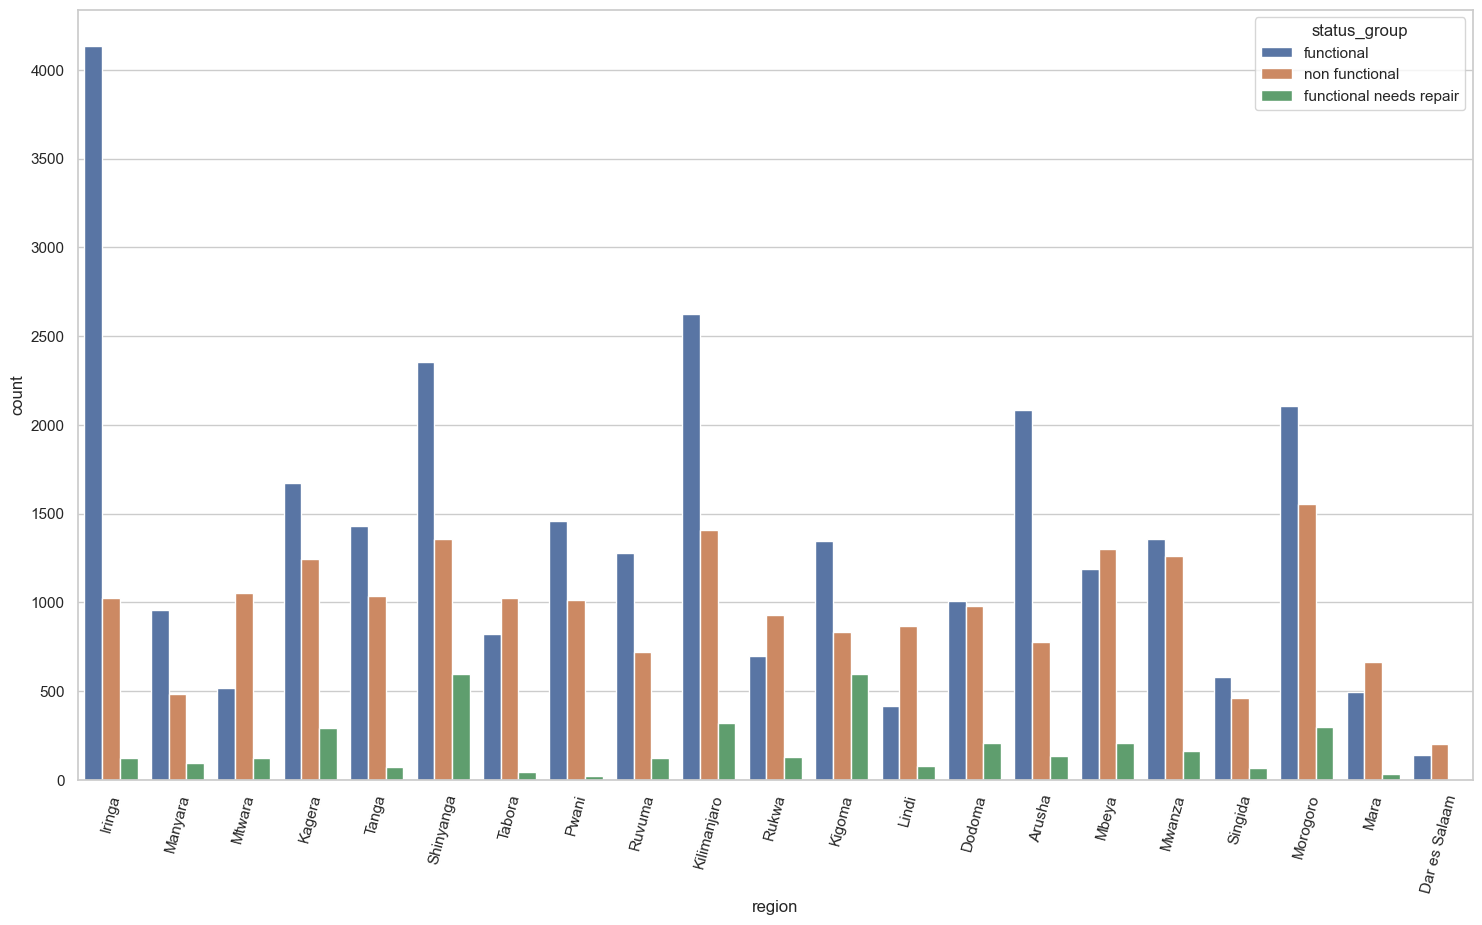

In [1492]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='region', hue="status_group", data=df)
plt.xticks(rotation=75);


Iringa Region has a wide range of functional water wells , while Morogoro region has most non functinal water wells

#### Basin and Quantity

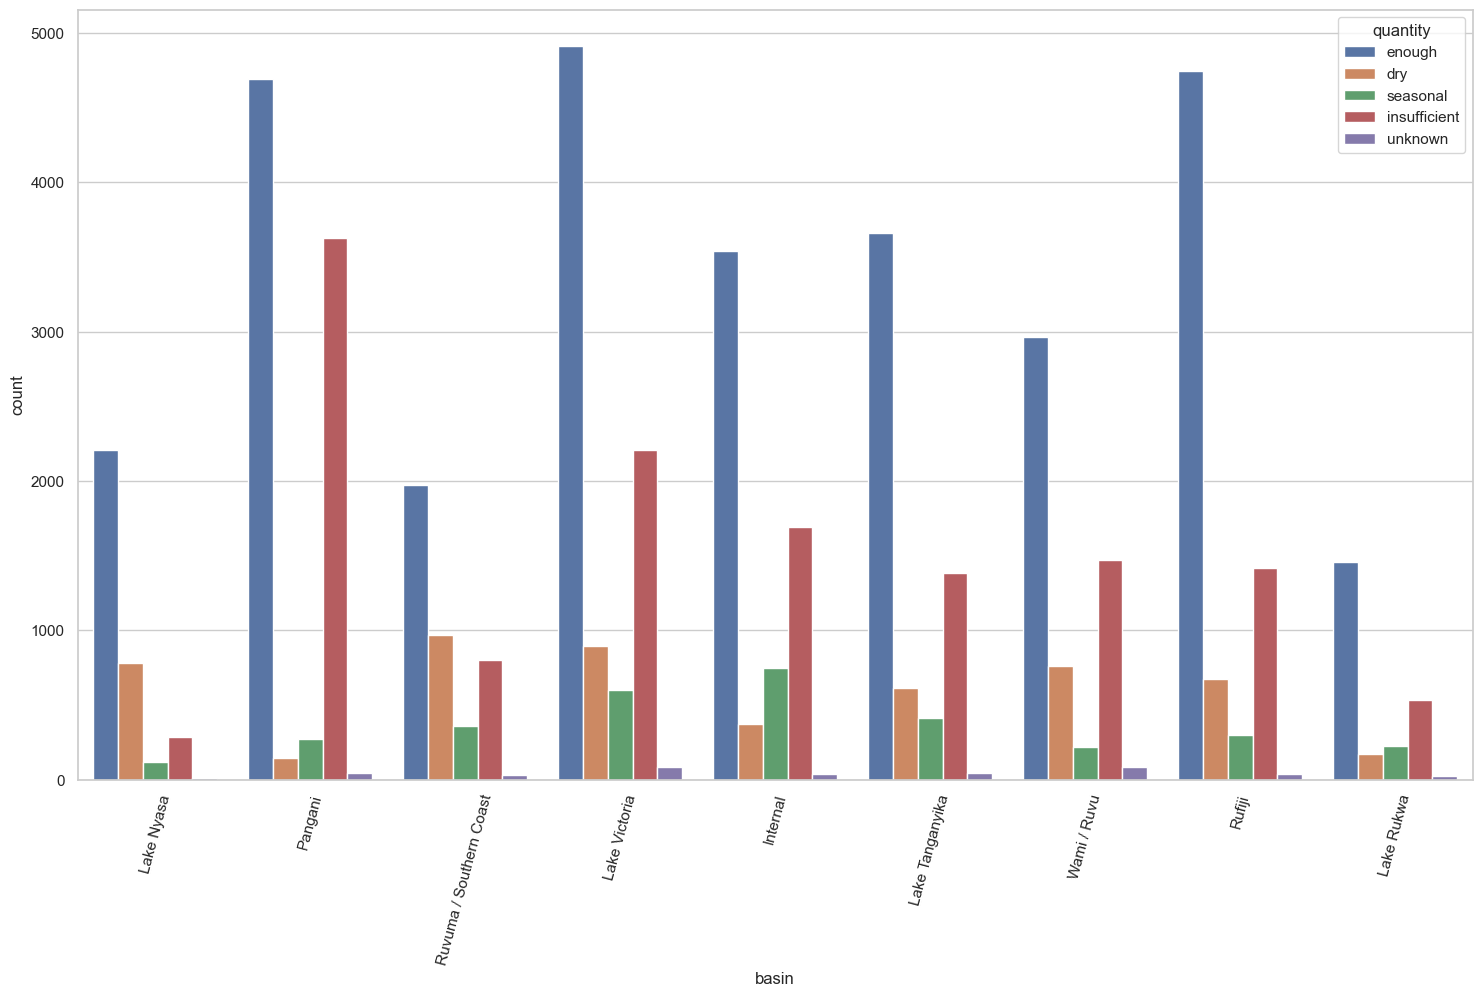

In [1493]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="quantity", data=df)
plt.xticks(rotation=75);


Lake Victoria has the most quantity of water



#### Payment and Funcionality

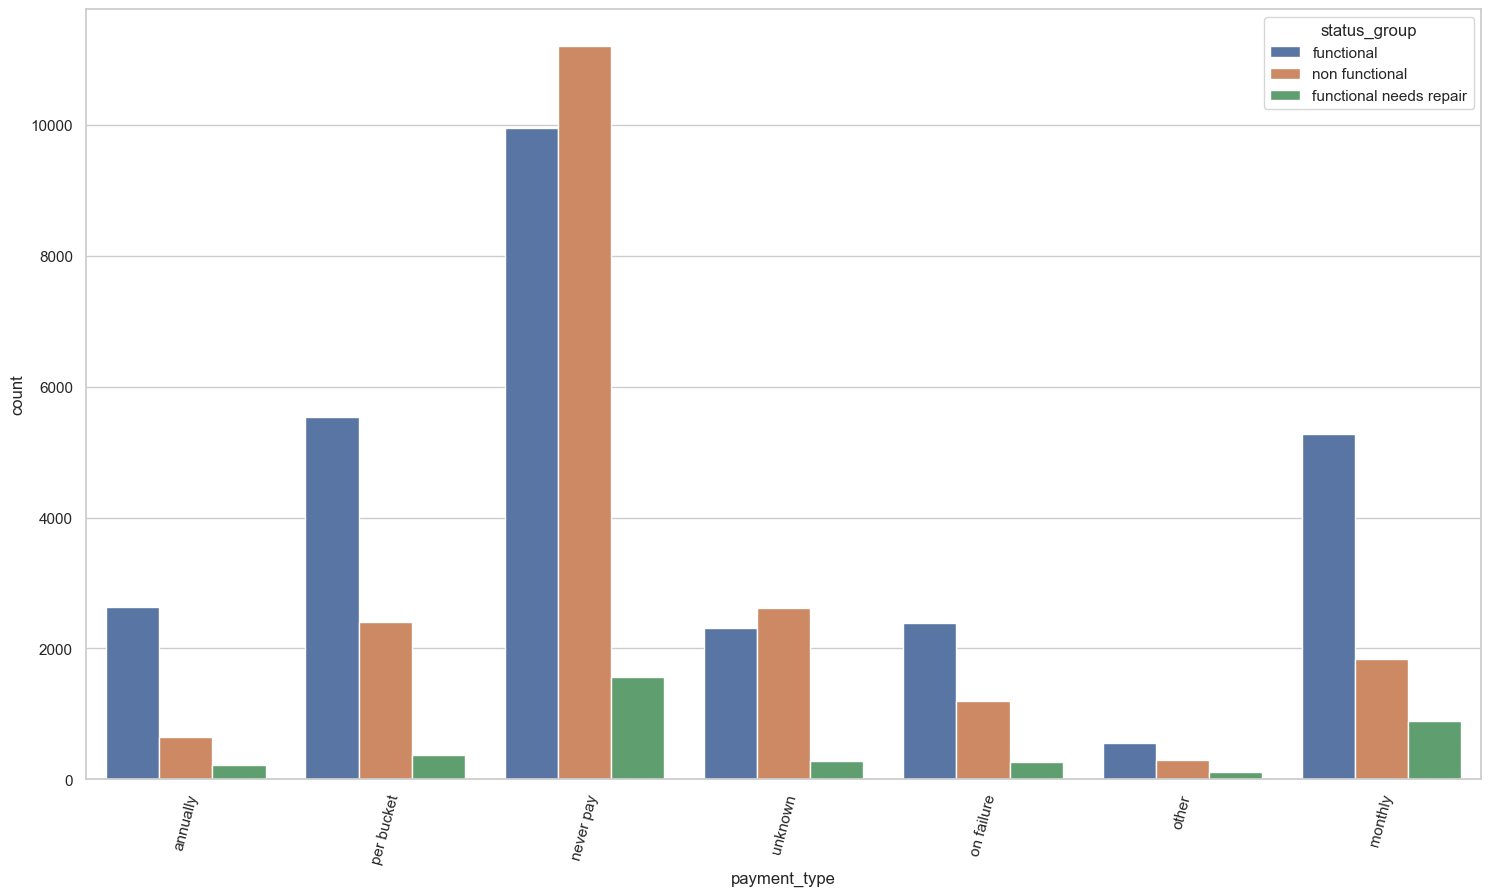

In [1494]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='payment_type', hue="status_group", data=df)
plt.xticks(rotation=75);

The majority of operational and non-functional water pumps are not subject to any payment, potentially due to their communal nature.

# 6. Data Preprocessing

### Counting The Value Occurrences

In [1495]:
# Count the occurrences of each value in the 'status_group' column
status_group_counts = df['status_group'].value_counts()

# Display the counts
print(status_group_counts)


functional                 28653
non functional             20193
functional needs repair     3730
Name: status_group, dtype: int64


### Label Encoding

In [1496]:
df1 = df.copy()

# Define a dictionary to map categorical values to numerical values
new_status_group = {'non functional': 0, 'functional': 1, 'functional needs repair': 2}

# Replace categorical values in the 'status_group' column with numerical values
df1['status_group'] = df1['status_group'].replace(new_status_group)


### Feature Selection And One-Hot Encoding

In [1497]:
categorical = ['basin', 'public_meeting', 'management', 'water_quality', 'quantity', 'source_type']
ohe = pd.get_dummies(df[categorical], prefix = categorical, drop_first=True )

In [1498]:
# combining the one hot encoded dataset with amount_tsh column

new_df = pd.concat([ohe, df1['amount_tsh']], axis = 1)

### Train-Test Split.

In [1499]:
# Defining x and y
X = new_df  # Features
y = df1['status_group']  # Target variable

# Performing train-test split with a test size of 20% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling

In [1500]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)


# 7. Data Modelling

### 7.1. Logistic Regression

In [1501]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model for multiclass classification
logreg = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the logistic regression model using the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6552871814378091
              precision    recall  f1-score   support

           0       0.73      0.43      0.54      4125
           1       0.63      0.90      0.74      5651
           2       0.00      0.00      0.00       740

    accuracy                           0.66     10516
   macro avg       0.45      0.45      0.43     10516
weighted avg       0.63      0.66      0.61     10516



C:\Users\pc\anaconda3\library\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\library\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\library\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

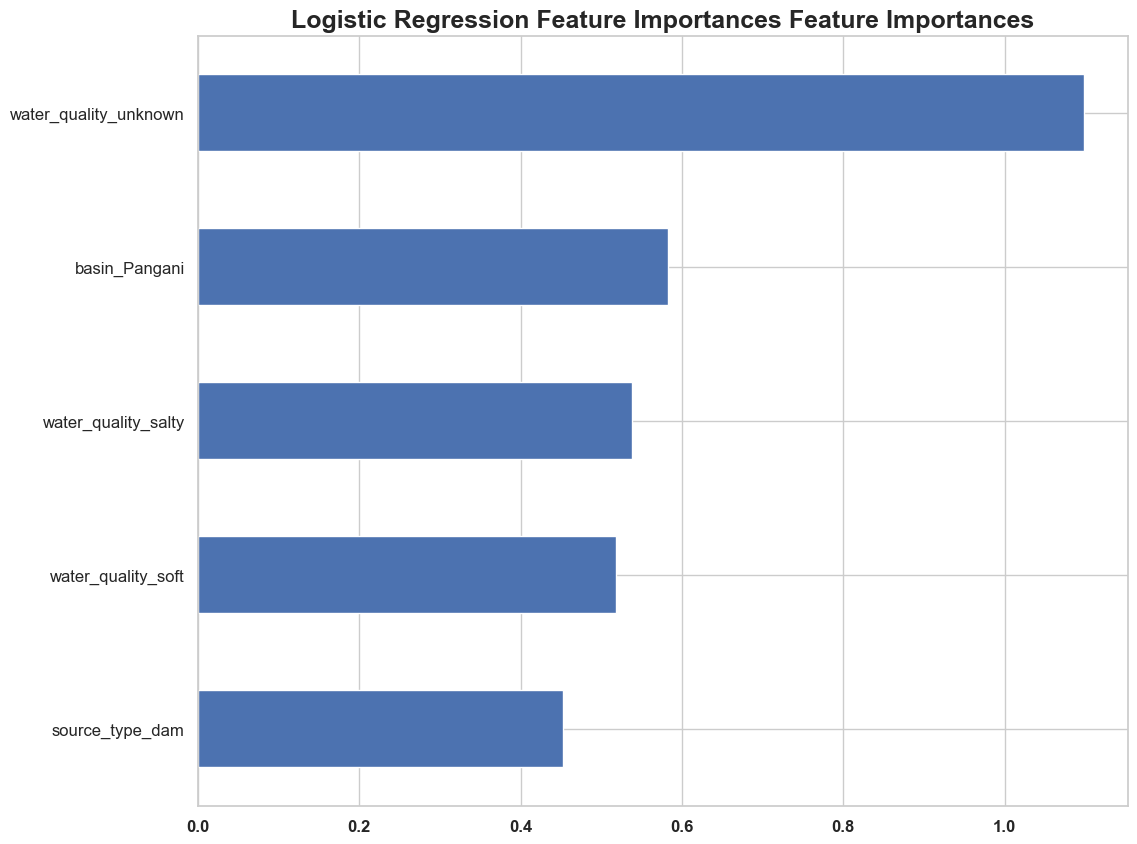

In [1502]:
def plot_feat_importance(logreg, feature_names, model_title):
    """Plots the feature importances of a LogisticRegression model using Seaborn."""
    
    # Retrieve feature importances from the model
    feature_importances = logreg.coef_[0]
    
    # Create a pandas Series to hold feature importances with feature names as index
    importance = pd.Series(feature_importances, index=feature_names)

    # Plot the feature importances using Seaborn
    plt.figure(figsize=(12, 10))
    fig = importance.sort_values().tail(5).plot(kind='barh')
    fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.show()

# Assuming 'X_train' and 'X_test' are your feature matrices, and 'y_train' and 'y_test' are your target variables
# 'logreg' is the Logistic Regression model trained using X_train and y_train

# Replace 'feature_names' with the actual list of feature names in your dataset
feature_names = X.columns.tolist()

# Replace 'model_title' with your desired model title
model_title = 'Logistic Regression Feature Importances'

# Call the function to plot feature importances
plot_feat_importance(logreg, feature_names, model_title)




The above graph shows the importance of various logistics regression features in our study. The graph shows that the top most important features for prediction

In [1503]:
coefficients = logreg.coef_
intercept = logreg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-4.78530945e-03  1.49874683e-01  1.19235033e-01  9.28564353e-02
   5.82199455e-01  2.08887843e-01  1.95134819e-01  2.34426033e-01
  -3.19191365e-01 -3.24411301e-02  2.24157146e-01  1.69203070e-01
  -1.50506242e-01  4.47490848e-02  2.86538083e-01  2.04492042e-01
   4.18620215e-01 -3.08570746e-01 -2.06677149e-01 -3.88620584e-01
  -8.99779556e-02  4.69988251e-02  3.20525188e-01  5.38088246e-01
  -6.11108361e-02  5.18033215e-01  1.09807621e+00 -2.48295153e+00
  -2.29470973e+00 -2.28648733e+00 -3.51770435e-02  4.52827565e-01
  -1.56359515e-01 -7.01629436e-01 -4.53679690e-01  1.33158178e-02
  -5.75241589e-01 -1.42603085e-04]
 [ 7.82242969e-01 -5.06976040e-01 -4.18661040e-01 -2.89612500e-01
  -8.97910946e-02  2.97442293e-01 -3.76296570e-01 -2.21593064e-02
   4.22620317e-01  2.82964703e-01 -1.88360820e-01 -3.05227258e-01
   7.35213437e-01 -3.84935475e-02 -1.24382307e-01 -1.02802564e-01
  -2.39949507e-01  3.38753140e-01  2.41285110e-01  5.36091167e-03
   1.59529688e-01 -3.910253

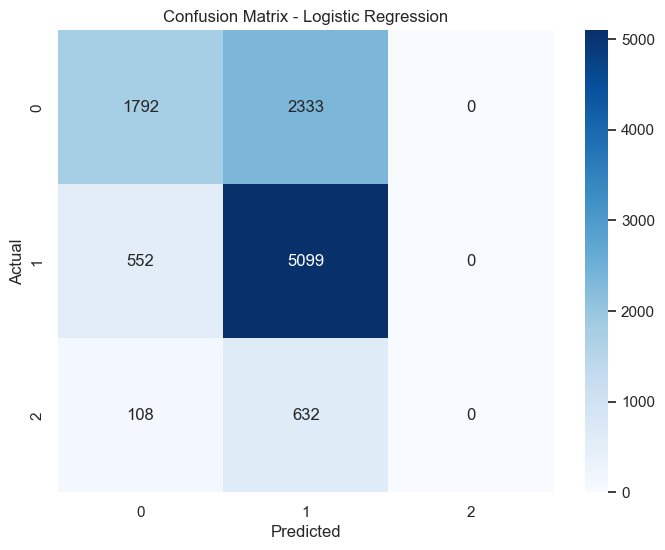

In [1504]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')  # Fix the typo here
plt.ylabel('Actual')
plt.show()


The model demonstrates an accuracy of approximately 65.5%. It shows a moderate level of precision and recall, where class 0 has a precision of 73% and recall of 43%, class 1 has a precision of 63% and recall of 90%, while class 2 has negligible precision and recall. The F1-score, an indicator of model accuracy, is 54% for class 0, 74% for class 1, and 0% for class 2. These metrics suggest the model's reasonable overall performance, albeit with challenges in correctly predicting class 2 instances. The weighted average of precision, recall, and F1-score stands at 63%, 66%, and 61%, respectively, indicating a balanced performance across classes when considering their support in the dataset.








### 7.2. Decision Tree Classifier

In [1505]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=random_seed)

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_selected = dt.predict(X_test)

# Model evaluation
result = classification_report(y_test, y_pred_selected)
print(result)


              precision    recall  f1-score   support

           0       0.74      0.62      0.67      4125
           1       0.70      0.85      0.77      5651
           2       0.47      0.11      0.17       740

    accuracy                           0.71     10516
   macro avg       0.64      0.53      0.54     10516
weighted avg       0.70      0.71      0.69     10516



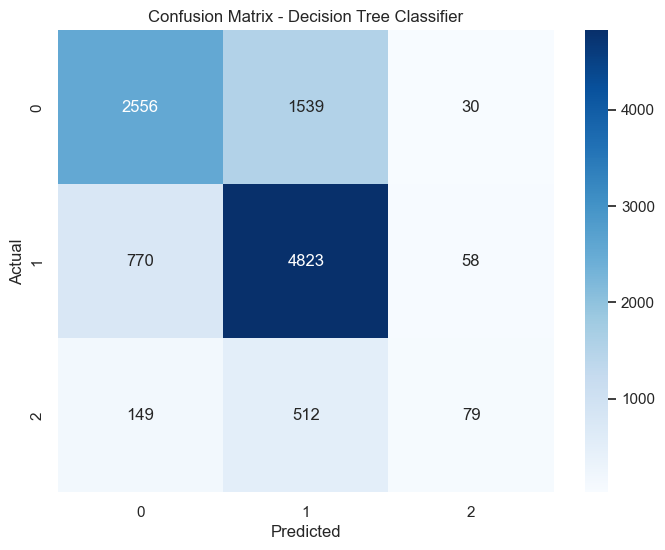

In [1506]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_selected)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


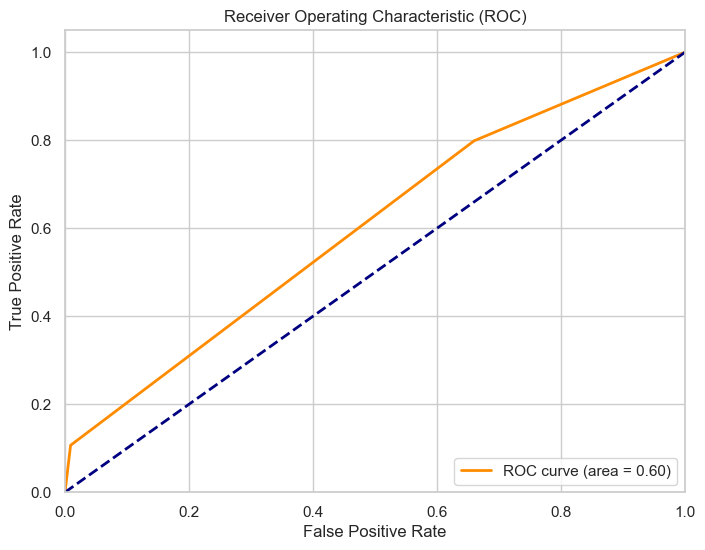

In [1507]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_selected, pos_label=2)  # Change pos_label according to your data

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The classifier demonstrates reasonably good performance, especially in predicting class 1, with a precision of 70% and recall of 85%. However, it struggles to identify instances of class 2, with a low recall score of 11% and precision of 47%. Overall accuracy stands at 71%, reflecting the model's overall predictive capability across all classes. The macro average F1-score of 54% indicates a moderate balance between precision and recall for the model's predictions across the classes, while the weighted average F1-score at 69% considers the class imbalance.

### 7.3. K-Nearest Neighbors

In [1508]:
# Create a pipeline
pipe_1 = Pipeline([('ss', StandardScaler()),
                    ('neighbors', KNeighborsClassifier())])

# Fit the training data
pipe_1.fit(X_train, y_train)  # Replace X_train, y_train with your training data

# Predict on test data
y_pred_1 = pipe_1.predict(X_test)  # Replace X_test with your test data

# Evaluation metrics function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))

# Print evaluation metrics
print_metrics(y_test, y_pred_1)

# Calculate RMSE of the model 
RMSE = round(mean_squared_error(y_test, y_pred_1, squared=False), 2)


Precision Score: 0.6574013487947639
Recall Score: 0.6719284899201218
Accuracy Score: 0.6719284899201218
F1 Score: 0.6631030889202673


In [1509]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Create a pipeline
pipe_1 = Pipeline([('ss', StandardScaler()), ('neighbors', KNeighborsClassifier())])

# Fit the training data
pipe_1.fit(X_train, y_train)

# Predict on test data
y_pred_1 = pipe_1.predict(X_test)

# Print evaluation metrics
print_metrics(y_test, y_pred_1)

# Calculate RMSE of the model 
RMSE = round(mean_squared_error(y_test, y_pred_1, squared=False), 2)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(conf_matrix)


Precision Score: 0.6574013487947639
Recall Score: 0.6719284899201218
Accuracy Score: 0.6719284899201218
F1 Score: 0.6631030889202673
Confusion Matrix:
[[2731 1332   62]
 [1186 4232  233]
 [ 231  406  103]]


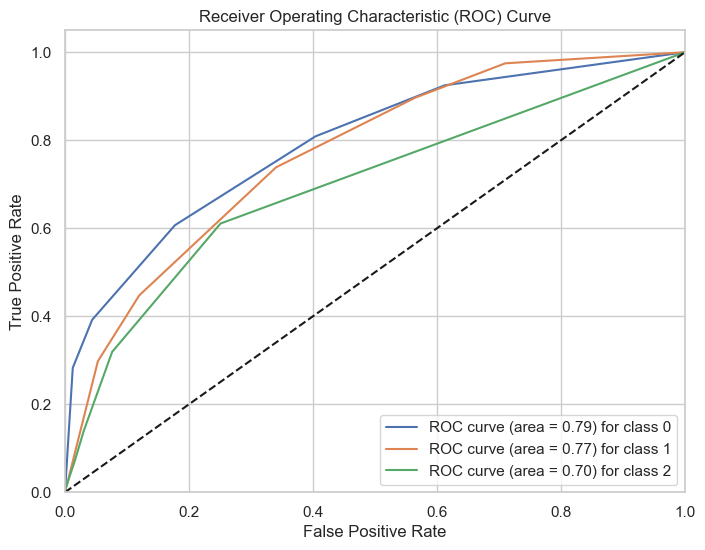

In [1510]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities for each class
y_probs = pipe_1.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Extract the roc curve values and auc for each class
for i in range(len(pipe_1.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(pipe_1.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 7.4. Ensemble Methods

### 7.5.1. Random Forest

Random Forest comprises multiple decision trees, each contributing its own classification decision. These trees collectively "vote" for a particular class, and the final prediction is determined by the majority vote across all trees in the forest. This process introduces significant variability among the individual trees, resulting in a diverse ensemble model.

In [1511]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create pipeline
pipe_3 = Pipeline([('forest', RandomForestClassifier())])

# Create a grid parameter
grid = {
    'forest__criterion': ['gini', 'entropy'],
    'forest__max_depth': [6, 7],
    'forest__max_features': [1.0],
    'forest__n_estimators': [100, 200]
}

# Create grid search with pipeline as the estimator and cv=3
gridsearch = GridSearchCV(
    estimator=pipe_3,
    param_grid=grid,
    scoring='accuracy',
    cv=3  # Change the cross-validation value to 3
)

# Fit training data using grid search
gridsearch.fit(X_train, y_train)

# Predict using grid search on test data
y_pred_3 = gridsearch.predict(X_test)

# Model Evaluation goes here (you can calculate evaluation metrics)


### Model Evaluation

In [1512]:
print_metrics(y_test, y_pred_3)


Precision Score: 0.7010789120097043
Recall Score: 0.6786801065043743
Accuracy Score: 0.6786801065043743
F1 Score: 0.6412055220484191


### Feature Importance

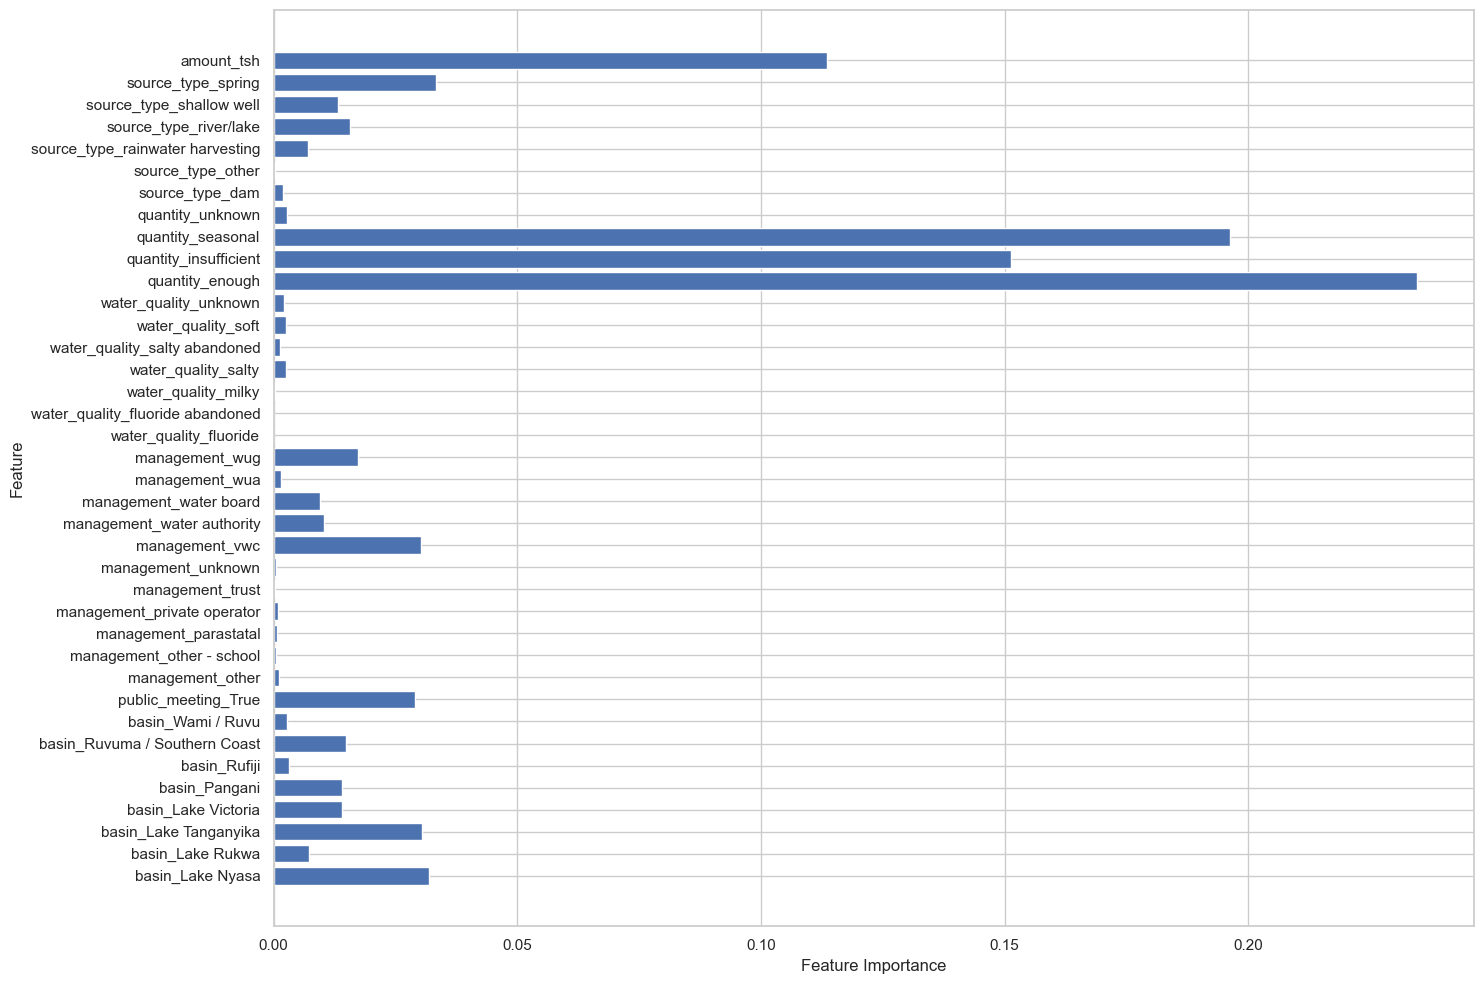

In [1513]:
def plot_feature_importances(model, X_train):
    if isinstance(model, Pipeline):
        last_step = model.steps[-1][1] 
        if hasattr(last_step, 'feature_importances_'):
            n_features = X_train.shape[1]
            plt.figure(figsize=(15, 10))
            plt.barh(range(n_features), last_step.feature_importances_, align='center')
            plt.yticks(np.arange(n_features), X_train.columns.values)
            plt.xlabel('Feature Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            return
    print("Error: The model does not have feature importances.")

plot_feature_importances(gridsearch.best_estimator_, X_train)

### 7.5.2. Gradient Boosting¶


Boosting Algorithms, often termed as weak learners, function by iteratively training individual weak learners. They identify the instances that were misclassified by the preceding weak learner, and subsequently construct another learner to address these misclassifications. This iterative process continues until a predefined stopping criterion is reached, which could be a set limit on the number of weak learners or when the model's performance reaches a plateau. As a result, each new weak learner is specialized in improving upon the areas of weakness identified by its predecessors.

In [1524]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost Classifier
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.05],
    'max_depth': [5, 6],
    'n_estimators': [100, 150]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit training data using grid search
grid_search.fit(X_train, y_train)

# Predict testing data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)


### Model Evaluation

In [1526]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Assuming y_pred contains the predicted labels and y_test contains the true labels
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision Score:", precision)
print("Recall Score:", recall)
print("Accuracy Score:", accuracy)
print("F1 Score:", f1)



Precision Score: 0.7047240240454167
Recall Score: 0.7057816660327121
Accuracy Score: 0.7057816660327121
F1 Score: 0.6808685475640027


In [1531]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_pred contains the predicted labels and y_test contains the true labels
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.5755907214201887


### Evaluation

The primary focus of this project lies in minimizing False Negatives and enhancing the True Positive Rate, especially concerning mortality rates linked to insufficient water supply. Achieving a recall and accuracy score of 70%+ was our main goal for the model, and we successfully attained this using Gradient Boosting, making it the ideal choice for predicting water pump functionality. Additionally, we evaluated the model's efficiency, and the root mean squared error, which was close to zero, was indicative of its effectiveness.

### Conclusion

The model's performance, although indicative of progress, requires further enhancement. Despite achieving a 70% accuracy rate, it might not be deemed commendable in certain high-stakes scenarios where precision is paramount. Continuous training with updated data could substantially refine the model's predictions and address the existing dataset imbalance. This process is fundamental for enhancing the model's robustness and predictive capabilities.

# Reccomendations

1. The WHO should collaborate with the government to efficiently mobilize funds to support the initiative.

2. Once the WHO initiates the program, they should consider engaging DWE to handle water pump installations.

3. Features like amount_tsh (water pump pressure) and water quantity serve as crucial indicators of water pump functionality. Utilizing these features will aid in determining the functionality of a water pump.

4. Lake Victoria, despite being one of the largest water bodies in the region, has a high number of non-functional wells. An exploration by the WHO in this region could reveal the underlying causes and enable the formulation of effective solutions.


It's noteworthy that a significant portion of the population resides away from wells, and about two-thirds have access to water supply. Additionally, the country's urbanization rate is growing at a rate of 0.7% annually. This suggests that many individuals might have shifted to using piped water instead of well water. If the WHO expands its initiative to include access to water supply in urban areas alongside the repair and construction of water pumps, it would significantly contribute to achieving their Sustainable Development Goals by 2030.





